In [1]:
import pandas as pd
import numpy as np
import os
import json
import ast
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
base_path = "../data/buckets/"
directories = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]
directories

['66c516b1d61c7b572205f713',
 '66c5e9afb11bf5c62a286fe8',
 '66c616da5ea4ebca7f461ac7',
 '66c63f4f7c3e886b7c9cc498',
 '66c63f502b78911af098063d',
 '66c90fcc4541f87369be0127']

In [3]:
activity_dfs = []
survey_dfs = []
documents_dfs = []

for directory in directories:
    # Construct the path to participant_info.json
    file_path_acitivity = os.path.join(base_path, directory, 'activity.csv')
    activity_dfs.append(pd.read_csv(file_path_acitivity))
    
    file_path_survey = os.path.join(base_path, directory, 'survey.csv')
    survey_dfs.append(pd.read_csv(file_path_survey))
    
    file_path_docs = os.path.join(base_path, directory, 'docs.csv')
    documents_dfs.append(pd.read_csv(file_path_docs))
    

In [4]:
master_activity_df = pd.concat(activity_dfs, ignore_index=True)
master_survey_df = pd.concat(survey_dfs, ignore_index=True)
master_documents_df = pd.concat(documents_dfs, ignore_index=True)

In [5]:
task_name_mapping = {
    ("66c516b1d61c7b572205f713", "main_task_1"): "ENG",
    ("66c5e9afb11bf5c62a286fe8", "main_task_1"): "ENG_1",
    ("66c5e9afb11bf5c62a286fe8", "main_task_2"): "ESP_2",
    ("66c616da5ea4ebca7f461ac7", "main_task_1"): "ENG_1",
    ("66c616da5ea4ebca7f461ac7", "main_task_2"): "ESP_2",
    ("66c63f4f7c3e886b7c9cc498", "main_task_1"): "ENG_2",
    ("66c63f4f7c3e886b7c9cc498", "main_task_2"): "ESP_1",
    ("66c994e78d5b3da79c6cc853", "main_task_1"): "ENG_2",
    ("66c994e78d5b3da79c6cc853", "main_task_2"): "ESP_1",
    ("66c63f502b78911af098063d", "main_task_1"): "ENG_2",
    ("66c63f502b78911af098063d", "main_task_2"): "ESP_1",
    ("66c90fcc4541f87369be0127", "main_task_1"): "ENG_No_LLM",
}

In [6]:
master_activity_df['task_id'].replace('sandbox_task_1_eng','main_task_1', inplace=True)
master_survey_df['task_id'].replace('sandbox_task_1_eng','main_task_1', inplace=True)
master_documents_df['task_id'].replace('sandbox_task_1_eng','main_task_1', inplace=True)

In [7]:
master_activity_df['TASK_ID'] = master_activity_df.apply(
    lambda x: task_name_mapping.get((x['study_id'], x['task_id']), x['task_id']),
    axis=1
)

master_survey_df['TASK_ID'] = master_survey_df.apply(
    lambda x: task_name_mapping.get((x['study_id'], x['task_id']), x['task_id']),
    axis=1
)


master_documents_df['TASK_ID'] = master_documents_df.apply(
    lambda x: task_name_mapping.get((x['study_id'], x['task_id']), x['task_id']),
    axis=1
)

In [8]:
master_documents_df

,_id,content,name,chunks,timestamp,task_id,prolific_id,study_id,plain_text,word_count,TASK_ID
0,66c5a13c86c57a87db6f59d9,"<p class=""llmparagraph id0""><span id=""chunk_TD...",NaN,"[{'frontend_id': 'chunk_JfRRo', 'versions': [{...",2024-08-21 08:11:40.473000+00:00,main_task_1,5a4ff22bacc75b000179b0e9,66c516b1d61c7b572205f713,Join hands with us in protecting our planet's ...,193,ENG
1,66c5e4be2f44d7b54f76e52d,"<p><span class=""chunk factor_9b1tC"" style=""bac...",NaN,"[{'frontend_id': 'chunk_TG1Gd', 'versions': [{...",2024-08-21 12:59:42.981000+00:00,main_task_1,5c068f1f9d0df40001e5688c,66c516b1d61c7b572205f713,In a time of uncertainty for the future of our...,167,ENG
2,66c5a21086c57a87db6f59e1,"<p class=""llmparagraph id0""><span id=""chunk_AK...",NaN,"[{'frontend_id': 'chunk_AKbWr', 'versions': [{...",2024-08-21 08:15:12.263000+00:00,main_task_1,5c62de3f48fe4e000180e09d,66c516b1d61c7b572205f713,We are at a critical juncture where our inacti...,291,ENG
3,66c88773e46942c099b32393,"<p class=""llmparagraph id0""><span id=""chunk_Hj...",NaN,"[{'frontend_id': 'chunk_d3be5', 'versions': [{...",2024-08-23 12:58:27.681000+00:00,main_task_1,5d1f9776676cd1001580ae9c,66c516b1d61c7b572205f713,As you consider donating to the World Wildlife...,149,ENG
4,66c5a3e386c57a87db6f59f9,"<p class=""llmparagraph id1"">&nbsp;</p>\n<p cla...",NaN,"[{'frontend_id': 'chunk_JAHGD', 'versions': [{...",2024-08-21 08:22:59.626000+00:00,main_task_1,5ea9a41b87b4150bf9634637,66c516b1d61c7b572205f713,\nThe World Wildlife Fund (WWF) is a beacon o...,156,ENG
...,...,...,...,...,...,...,...,...,...,...,...
91,66c9da94925382be577189a2,"<p>Truly, a world without a wildlife is dull. ...",NaN,[],{'$date': '2024-08-24T13:05:24.876Z'},main_task_1,5f7f07d317a72e01b1c57f27,66c90fcc4541f87369be0127,"Truly, a world without a wildlife is dull. Tog...",72,ENG_No_LLM
92,66c9dbe4925382be577189af,<p>&nbsp;</p>\n<p><strong>Know About Willdlife...,NaN,[],{'$date': '2024-08-24T13:11:00.045Z'},main_task_1,66a3b18c58afbaf406f6ed4a,66c90fcc4541f87369be0127,\nKnow About Willdlife\nWorldWild Life as a c...,93,ENG_No_LLM
93,66c9dc59925382be577189b5,"<p>Join us, the World Wild Life Organization i...",NaN,[],{'$date': '2024-08-24T13:12:57.663Z'},main_task_1,60897f81d4a682307c628739,66c90fcc4541f87369be0127,"Join us, the World Wild Life Organization in o...",87,ENG_No_LLM
94,66c9f03a925382be577189c6,"<p style=""text-align: justify;"">Do you sometim...",Show the earth your love,[],{'$date': '2024-08-24T14:37:46.182Z'},main_task_1,5efc4a5bed804f20d1c1b0f4,66c90fcc4541f87369be0127,Do you sometimes look around and think just ho...,125,ENG_No_LLM


In [9]:
master_documents_df['TASK_ID'].value_counts()

TASK_ID
ENG           16
ENG_1         16
ESP_2         16
ESP_1         16
ENG_2         16
ENG_No_LLM    16
Name: count, dtype: int64

In [11]:
master_documents_df[master_documents_df['TASK_ID'].str.contains('ENG')].sort_values(by=['prolific_id','task_id'])[['TASK_ID','prolific_id','plain_text']].to_csv('master_test.csv')

In [12]:
master_documents_df[master_documents_df['TASK_ID'].str.contains('ESP')].sort_values(by=['prolific_id','task_id'])[['TASK_ID','prolific_id','plain_text']].to_csv('master_test_esp.csv')

In [10]:
master_activity_df.to_csv("../data/buckets_combined/master_activity.csv", index=False)
master_survey_df.to_csv("../data/buckets_combined/master_survey.csv", index=False)
master_documents_df.to_csv("../data/buckets_combined/master_documents.csv", index=False)

In [48]:
master_activity_df = pd.read_csv("../data/buckets_combined/master_activity.csv")
master_survey_df = pd.read_csv("../data/buckets_combined/master_survey.csv")
master_documents_df = pd.read_csv("../data/buckets_combined/master_documents.csv")

# Survey

In [24]:
master_survey_df

,_id,prolific_id,study_id,task_id,responses,timestamp,TASK_ID
0,66c5a2b186c57a87db6f59e7,5a4ff22bacc75b000179b0e9,66c516b1d61c7b572205f713,main_task_1,{'usefulness': {'Variation - Gain Framing with...,2024-08-21 08:17:53.353000+00:00,ENG
1,66c5e9ba2f44d7b54f76e539,5c068f1f9d0df40001e5688c,66c516b1d61c7b572205f713,main_task_1,{'usefulness': {'Variation - Positive Narrativ...,2024-08-21 13:20:58.090000+00:00,ENG
2,66c5a35986c57a87db6f59f2,5c62de3f48fe4e000180e09d,66c516b1d61c7b572205f713,main_task_1,{'usefulness': {'Variation - Gain Framing with...,2024-08-21 08:20:41.346000+00:00,ENG
3,66c88879e46942c099b32396,5d1f9776676cd1001580ae9c,66c516b1d61c7b572205f713,main_task_1,{'usefulness': {'Variation - Positive Narrativ...,2024-08-23 13:02:49.754000+00:00,ENG
4,66c5a63386c57a87db6f5a01,5ea9a41b87b4150bf9634637,66c516b1d61c7b572205f713,main_task_1,{'usefulness': {'@ai to Generate New Texts': '...,2024-08-21 08:32:51.278000+00:00,ENG
...,...,...,...,...,...,...,...
91,66c9e062925382be577189bf,66a3b18c58afbaf406f6ed4a,66c90fcc4541f87369be0127,main_task_1,"{'usefulness': {}, 'ownership': {'I feel that ...",2024-08-24 13:30:10.120000+00:00,ENG_No_LLM
92,66c9e0b4925382be577189c0,66b1ec19c4d39cbd3d1edc15,66c90fcc4541f87369be0127,main_task_1,"{'usefulness': {}, 'ownership': {'I feel that ...",2024-08-24 13:31:32.338000+00:00,ENG_No_LLM
93,66c9e130925382be577189c2,6676842beee8713bc1b33408,66c90fcc4541f87369be0127,main_task_1,"{'usefulness': {}, 'ownership': {'I feel that ...",2024-08-24 13:33:36.910000+00:00,ENG_No_LLM
94,66c9f26e925382be577189ca,5efc4a5bed804f20d1c1b0f4,66c90fcc4541f87369be0127,main_task_1,"{'usefulness': {}, 'ownership': {'I feel that ...",2024-08-24 14:47:10.908000+00:00,ENG_No_LLM


In [25]:
scale_mapping = {
    "Strongly Disagree": 1,
    "Disagree": 2,
    "Neutral": 3,
    "Agree": 4,
    "Strongly Agree": 5
}

In [26]:
master_survey_df['responses'] = master_survey_df['responses'].apply(ast.literal_eval)

In [29]:
master_survey_df

,_id,prolific_id,study_id,task_id,responses,timestamp,TASK_ID
0,66c5a2b186c57a87db6f59e7,5a4ff22bacc75b000179b0e9,66c516b1d61c7b572205f713,main_task_1,{'usefulness': {'Variation - Gain Framing with...,2024-08-21 08:17:53.353000+00:00,ENG
1,66c5e9ba2f44d7b54f76e539,5c068f1f9d0df40001e5688c,66c516b1d61c7b572205f713,main_task_1,{'usefulness': {'Variation - Positive Narrativ...,2024-08-21 13:20:58.090000+00:00,ENG
2,66c5a35986c57a87db6f59f2,5c62de3f48fe4e000180e09d,66c516b1d61c7b572205f713,main_task_1,{'usefulness': {'Variation - Gain Framing with...,2024-08-21 08:20:41.346000+00:00,ENG
3,66c88879e46942c099b32396,5d1f9776676cd1001580ae9c,66c516b1d61c7b572205f713,main_task_1,{'usefulness': {'Variation - Positive Narrativ...,2024-08-23 13:02:49.754000+00:00,ENG
4,66c5a63386c57a87db6f5a01,5ea9a41b87b4150bf9634637,66c516b1d61c7b572205f713,main_task_1,{'usefulness': {'@ai to Generate New Texts': '...,2024-08-21 08:32:51.278000+00:00,ENG
...,...,...,...,...,...,...,...
91,66c9e062925382be577189bf,66a3b18c58afbaf406f6ed4a,66c90fcc4541f87369be0127,main_task_1,"{'usefulness': {}, 'ownership': {'I feel that ...",2024-08-24 13:30:10.120000+00:00,ENG_No_LLM
92,66c9e0b4925382be577189c0,66b1ec19c4d39cbd3d1edc15,66c90fcc4541f87369be0127,main_task_1,"{'usefulness': {}, 'ownership': {'I feel that ...",2024-08-24 13:31:32.338000+00:00,ENG_No_LLM
93,66c9e130925382be577189c2,6676842beee8713bc1b33408,66c90fcc4541f87369be0127,main_task_1,"{'usefulness': {}, 'ownership': {'I feel that ...",2024-08-24 13:33:36.910000+00:00,ENG_No_LLM
94,66c9f26e925382be577189ca,5efc4a5bed804f20d1c1b0f4,66c90fcc4541f87369be0127,main_task_1,"{'usefulness': {}, 'ownership': {'I feel that ...",2024-08-24 14:47:10.908000+00:00,ENG_No_LLM


In [37]:


# Given survey data (assuming these are in a list)
survey_data = master_survey_df['responses'].tolist()

# Feature mapping and categories
feature_mapping = {
    "FEAT_1": "Variation - Positive Narrative Framing",
    "FEAT_2": "Variation - Cautionary Narrative Framing",
    "FEAT_3": "Variation - Positive Narrative Framing with Statistics",
    "FEAT_4": "Variation - Cautionary Narrative with Statistics",
    "FEAT_5": "Variation - Emphasis on Immediate Outcome",
    "FEAT_6": "Variation - Emphasis on Long-Term Outcome",
    "FEAT_7": "@ai to Generate New Texts",
    "FEAT_8": "Create Continuation"
}

categories = {
    "Ownership": ["OWN_1", "OWN_2", "OWN_3"],
    "Benefits of Co-writing": ["COLAB_1", "COLAB_2", "COLAB_3"],
    "LLM Prowess": ["LM_1", "LM_2", "LM_3", "LM_4"],
}

# Initialize list for DataFrame rows
# Initialize list for DataFrame rows
rows = []

# Process each survey
for _, row in master_survey_df.iterrows():
    survey = row['responses']
    row_data = {}

    # Extract basic information from the original DataFrame
    row_data['PROLIFIC_PID'] = row['prolific_id']
    row_data['STUDY_ID'] = row['study_id']
    row_data['TASK_ID'] = row['TASK_ID']

    # Extract and map ownership responses
    ownership = survey.get('ownership', {})
    for i, key in enumerate(categories['Ownership']):
        row_data[key] = scale_mapping.get(ownership.get(list(ownership.keys())[i], 'NA'), 'NA')

    if row['TASK_ID'] != "ENG_No_LLM":
        # Map collaboration responses
        collaboration = survey.get('collaboration', {})
        for i, key in enumerate(categories['Benefits of Co-writing']):
            row_data[key] = scale_mapping.get(collaboration.get(list(collaboration.keys())[i], 'NA'), 'NA')

        # Map LLM Prowess responses
        aiCapabilities = survey.get('aiCapabilities', {})
        for i, key in enumerate(categories['LLM Prowess']):
            row_data[key] = scale_mapping.get(aiCapabilities.get(list(aiCapabilities.keys())[i], 'NA'), 'NA')

        # Extract and map feature responses (keeping these as they are without scaling)
        usefulness = survey.get('usefulness', {})
        for feat_key, feat_name in feature_mapping.items():
            row_data[feat_key] = usefulness.get(feat_name, 'NA')
    else:
        # If TASK_ID is ENG_No_LLM, set collaboration, LLM Prowess, and feature responses to 'NA'
        for key in categories['Benefits of Co-writing']:
            row_data[key] = 'NA'

        for key in categories['LLM Prowess']:
            row_data[key] = 'NA'

        for feat_key in feature_mapping.keys():
            row_data[feat_key] = 'NA'

    # Append the row_data to the rows list
    rows.append(row_data)

# Create DataFrame with the required columns
final_df = pd.DataFrame(rows, columns=[
    "PROLIFIC_PID", "STUDY_ID", "TASK_ID", 
    "OWN_1", "OWN_2", "OWN_3", 
    "COLAB_1", "COLAB_2", "COLAB_3", 
    "LM_1", "LM_2", "LM_3", "LM_4", 
    "FEAT_1", "FEAT_2", "FEAT_3", "FEAT_4", 
    "FEAT_5", "FEAT_6", "FEAT_7", "FEAT_8"
])

# Display or save the final DataFrame


# Display or save the final DataFrame


In [38]:
final_df

,PROLIFIC_PID,STUDY_ID,TASK_ID,OWN_1,OWN_2,OWN_3,COLAB_1,COLAB_2,COLAB_3,LM_1,...,LM_3,LM_4,FEAT_1,FEAT_2,FEAT_3,FEAT_4,FEAT_5,FEAT_6,FEAT_7,FEAT_8
0,5a4ff22bacc75b000179b0e9,66c516b1d61c7b572205f713,ENG,1,2,1,4,5,2,5,...,5,5,NA,NA,NA,NA,NA,NA,77,4
1,5c068f1f9d0df40001e5688c,66c516b1d61c7b572205f713,ENG,5,2,4,4,4,4,4,...,4,4,39,NA,75,12,29,16,NA,NA
2,5c62de3f48fe4e000180e09d,66c516b1d61c7b572205f713,ENG,4,2,2,4,5,3,3,...,4,4,NA,NA,NA,NA,NA,NA,82,36
3,5d1f9776676cd1001580ae9c,66c516b1d61c7b572205f713,ENG,3,5,1,4,3,4,4,...,5,4,87,NA,20,NA,49,87,88,NA
4,5ea9a41b87b4150bf9634637,66c516b1d61c7b572205f713,ENG,4,4,4,5,5,2,4,...,4,4,NA,NA,NA,NA,NA,NA,100,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,66a3b18c58afbaf406f6ed4a,66c90fcc4541f87369be0127,ENG_No_LLM,4,4,4,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
92,66b1ec19c4d39cbd3d1edc15,66c90fcc4541f87369be0127,ENG_No_LLM,5,5,5,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
93,6676842beee8713bc1b33408,66c90fcc4541f87369be0127,ENG_No_LLM,5,5,5,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
94,5efc4a5bed804f20d1c1b0f4,66c90fcc4541f87369be0127,ENG_No_LLM,4,4,4,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [39]:
final_df['TASK_ID'].value_counts()

TASK_ID
ENG           16
ENG_1         16
ESP_2         16
ESP_1         16
ENG_2         16
ENG_No_LLM    16
Name: count, dtype: int64

In [40]:
final_df[final_df['PROLIFIC_PID']=='60c101e4634ffb1aa797b924']

,PROLIFIC_PID,STUDY_ID,TASK_ID,OWN_1,OWN_2,OWN_3,COLAB_1,COLAB_2,COLAB_3,LM_1,...,LM_3,LM_4,FEAT_1,FEAT_2,FEAT_3,FEAT_4,FEAT_5,FEAT_6,FEAT_7,FEAT_8
76,60c101e4634ffb1aa797b924,66c63f502b78911af098063d,ESP_1,2,2,4,4,2,2,4,...,4,4,50,65,64,NA,NA,59,100,NA
77,60c101e4634ffb1aa797b924,66c63f502b78911af098063d,ENG_2,4,4,2,4,4,5,4,...,3,4,80,65,60,22,20,NA,100,78


In [67]:
# final_df['TASK_ID'].replace('sandbox_task_1_eng','main_task_1', inplace=True)

In [41]:
final_df = final_df.replace('NA', 0)

In [46]:
final_df = final_df.replace('NA', np.nan)

In [42]:
final_df

,PROLIFIC_PID,STUDY_ID,TASK_ID,OWN_1,OWN_2,OWN_3,COLAB_1,COLAB_2,COLAB_3,LM_1,...,LM_3,LM_4,FEAT_1,FEAT_2,FEAT_3,FEAT_4,FEAT_5,FEAT_6,FEAT_7,FEAT_8
0,5a4ff22bacc75b000179b0e9,66c516b1d61c7b572205f713,ENG,1,2,1,4,5,2,5,...,5,5,0,0,0,0,0,0,77,4
1,5c068f1f9d0df40001e5688c,66c516b1d61c7b572205f713,ENG,5,2,4,4,4,4,4,...,4,4,39,0,75,12,29,16,0,0
2,5c62de3f48fe4e000180e09d,66c516b1d61c7b572205f713,ENG,4,2,2,4,5,3,3,...,4,4,0,0,0,0,0,0,82,36
3,5d1f9776676cd1001580ae9c,66c516b1d61c7b572205f713,ENG,3,5,1,4,3,4,4,...,5,4,87,0,20,0,49,87,88,0
4,5ea9a41b87b4150bf9634637,66c516b1d61c7b572205f713,ENG,4,4,4,5,5,2,4,...,4,4,0,0,0,0,0,0,100,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,66a3b18c58afbaf406f6ed4a,66c90fcc4541f87369be0127,ENG_No_LLM,4,4,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,66b1ec19c4d39cbd3d1edc15,66c90fcc4541f87369be0127,ENG_No_LLM,5,5,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93,6676842beee8713bc1b33408,66c90fcc4541f87369be0127,ENG_No_LLM,5,5,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94,5efc4a5bed804f20d1c1b0f4,66c90fcc4541f87369be0127,ENG_No_LLM,4,4,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# task_name_mapping = {
#     ("66c516b1d61c7b572205f713", "main_task_1"): "EN",
#     ("66c5e9afb11bf5c62a286fe8", "main_task_1"): "ENG1",
#     ("66c5e9afb11bf5c62a286fe8", "main_task_2"): "ESP2",
#     ("66c616da5ea4ebca7f461ac7", "main_task_1"): "ENG1",
#     ("66c616da5ea4ebca7f461ac7", "main_task_2"): "ESP2",
#     ("66c63f4f7c3e886b7c9cc498", "main_task_1"): "ENG2",
#     ("66c63f4f7c3e886b7c9cc498", "main_task_2"): "ESP1",
#     ("66c63f502b78911af098063d", "main_task_1"): "ENG2",
#     ("66c63f502b78911af098063d", "main_task_2"): "ESP1",
# }

# # Apply the task name mapping to the TASK_ID column
# final_df['TASK_ID'] = final_df.apply(
#     lambda x: task_name_mapping.get((x['STUDY_ID'], x['TASK_ID']), x['TASK_ID']),
#     axis=1
# )

In [64]:
final_df

,PROLIFIC_PID,STUDY_ID,TASK_ID,OWN_1,OWN_2,OWN_3,COLAB_1,COLAB_2,COLAB_3,LM_1,...,LM_3,LM_4,FEAT_1,FEAT_2,FEAT_3,FEAT_4,FEAT_5,FEAT_6,FEAT_7,FEAT_8
0,5a4ff22bacc75b000179b0e9,66c516b1d61c7b572205f713,EN,1,2,1,4,5,2,5,...,5,5,0,0,0,0,0,0,77,4
1,5c068f1f9d0df40001e5688c,66c516b1d61c7b572205f713,EN,5,2,4,4,4,4,4,...,4,4,39,0,75,12,29,16,0,0
2,5c62de3f48fe4e000180e09d,66c516b1d61c7b572205f713,EN,4,2,2,4,5,3,3,...,4,4,0,0,0,0,0,0,82,36
3,5d1f9776676cd1001580ae9c,66c516b1d61c7b572205f713,EN,3,5,1,4,3,4,4,...,5,4,87,0,20,0,49,87,88,0
4,5ea9a41b87b4150bf9634637,66c516b1d61c7b572205f713,EN,4,4,4,5,5,2,4,...,4,4,0,0,0,0,0,0,100,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,63ed9dbc1c7838ffcbb42142,66c63f502b78911af098063d,ENG2,1,1,1,4,5,2,4,...,4,4,0,0,0,0,0,0,100,0
76,60c101e4634ffb1aa797b924,66c63f502b78911af098063d,ESP1,2,2,4,4,2,2,4,...,4,4,50,65,64,0,0,59,100,0
77,60c101e4634ffb1aa797b924,66c63f502b78911af098063d,ENG2,4,4,2,4,4,5,4,...,3,4,80,65,60,22,20,0,100,78
78,6549030c68f0146d7216bb1c,66c63f502b78911af098063d,ESP1,4,4,4,4,4,3,4,...,4,4,0,0,0,0,0,0,0,0


In [43]:
final_df["TASK_ID"].unique()

array(['ENG', 'ENG_1', 'ESP_2', 'ESP_1', 'ENG_2', 'ENG_No_LLM'],
      dtype=object)

In [44]:
features = ["FEAT_1", "FEAT_2", "FEAT_3", "FEAT_4", "FEAT_5", "FEAT_6", "FEAT_7", "FEAT_8"]
features_task = features + ["TASK_ID"]
for feature in features:
    final_df[feature] = pd.to_numeric(final_df[feature], errors='coerce')


In [356]:
final_df[features_task]

,FEAT_1,FEAT_2,FEAT_3,FEAT_4,FEAT_5,FEAT_6,FEAT_7,FEAT_8,TASK_ID
0,0,0,0,0,0,0,77,4,ENG
1,39,0,75,12,29,16,0,0,ENG
2,0,0,0,0,0,0,82,36,ENG
3,87,0,20,0,49,87,88,0,ENG
4,0,0,0,0,0,0,100,15,ENG
...,...,...,...,...,...,...,...,...,...
91,0,0,0,0,0,0,0,0,ENG_No_LLM
92,0,0,0,0,0,0,0,0,ENG_No_LLM
93,0,0,0,0,0,0,0,0,ENG_No_LLM
94,0,0,0,0,0,0,0,0,ENG_No_LLM


In [359]:
feature_mapping

{'FEAT_1': 'Variation - Positive Narrative Framing',
 'FEAT_2': 'Variation - Cautionary Narrative Framing',
 'FEAT_3': 'Variation - Positive Narrative Framing with Statistics',
 'FEAT_4': 'Variation - Cautionary Narrative with Statistics',
 'FEAT_5': 'Variation - Emphasis on Immediate Outcome',
 'FEAT_6': 'Variation - Emphasis on Long-Term Outcome',
 'FEAT_7': '@ai to Generate New Texts',
 'FEAT_8': 'Create Continuation'}

In [367]:
final_df['sum_features'] = final_df[["FEAT_1", "FEAT_2", "FEAT_3", "FEAT_4", "FEAT_5", "FEAT_6", "FEAT_7", "FEAT_8"]].sum(axis=1)
grouped_df = final_df.groupby('TASK_ID')['sum_features'].sum().reset_index()


In [368]:
grouped_df

,TASK_ID,sum_features
0,ENG,3696
1,ENG_1,5649
2,ENG_2,5567
3,ENG_No_LLM,0
4,ESP_1,5450
5,ESP_2,5880


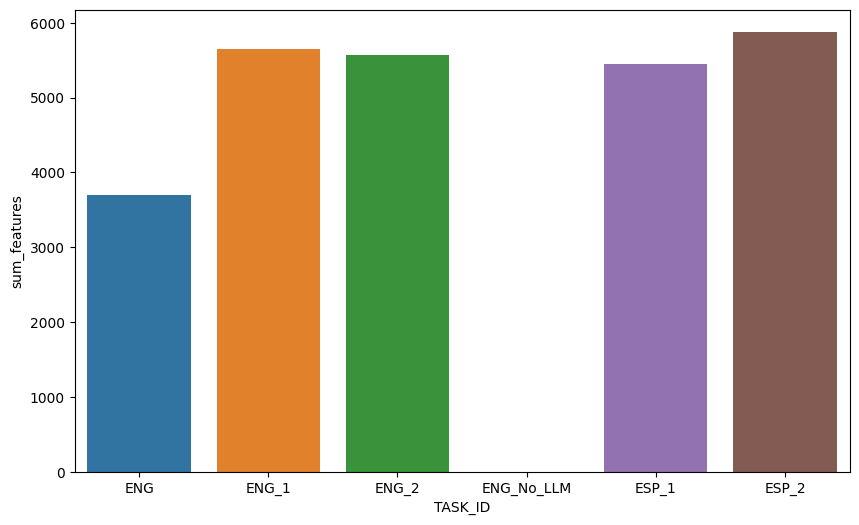

In [364]:
plt.figure(figsize=(10, 6))
sns.barplot(x='TASK_ID', y='sum_features', data=grouped_df, errorbar=None)
plt.show()

In [365]:
final_df['sum_features_ai_generate'] = final_df[[ "FEAT_7"]].sum(axis=1)
grouped_df = final_df.groupby('TASK_ID')['sum_features_ai_generate'].sum().reset_index()


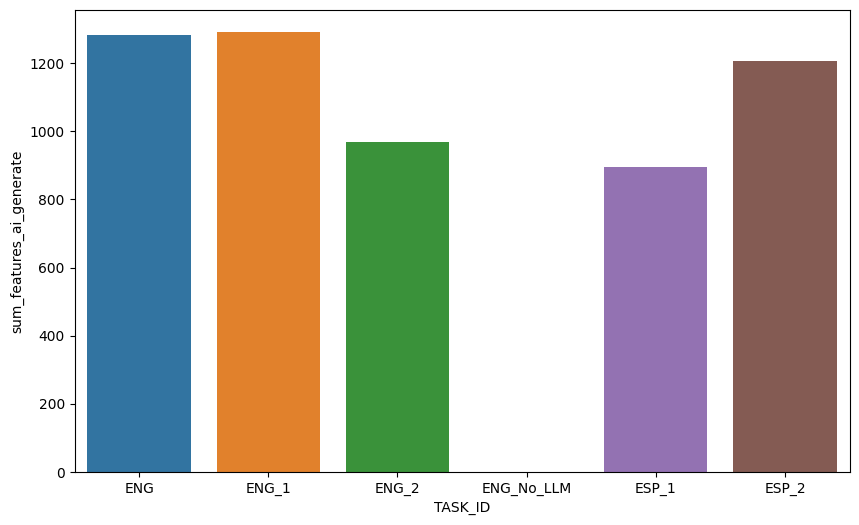

In [366]:
plt.figure(figsize=(10, 6))
sns.barplot(x='TASK_ID', y='sum_features_ai_generate', data=grouped_df, errorbar=None)
plt.show()

In [ ]:
# List of feature columns
grouped_df = final_df[features_task].groupby('TASK_ID').sum().reset_index()
grouped_df = grouped_df[grouped_df['TASK_ID']!='ENG_No_LLM']
# List of feature columns

# Create a graph for each feature
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='TASK_ID', y=feature, data=grouped_df, errorbar=None)
    plt.title(f'{feature_mapping.get(feature)} Feature\'s Usefulness in Different Experiment Conditions')
    plt.ylabel('Average Usefullness Score')
    plt.xlabel('Setups')
    plt.xticks(rotation=45)
    plt.show()

In [344]:
grouped_df

,TASK_ID,FEAT_1,FEAT_2,FEAT_3,FEAT_4,FEAT_5,FEAT_6,FEAT_7,FEAT_8
0,ENG,22.2500,14.1250,14.4375,8.3750,17.8750,22.2500,80.1250,51.5625
1,ENG_1,43.6875,30.1875,37.0000,30.3750,43.1250,42.6875,80.8125,45.1875
2,ENG_2,48.8750,45.5000,42.5625,35.5000,29.3750,41.0000,60.5000,44.6250
4,ESP_1,49.2500,44.4375,46.3125,29.5625,25.5625,52.8750,56.0000,36.6250
5,ESP_2,50.2500,34.0625,41.5000,34.6875,36.9375,48.1250,75.3750,46.5625


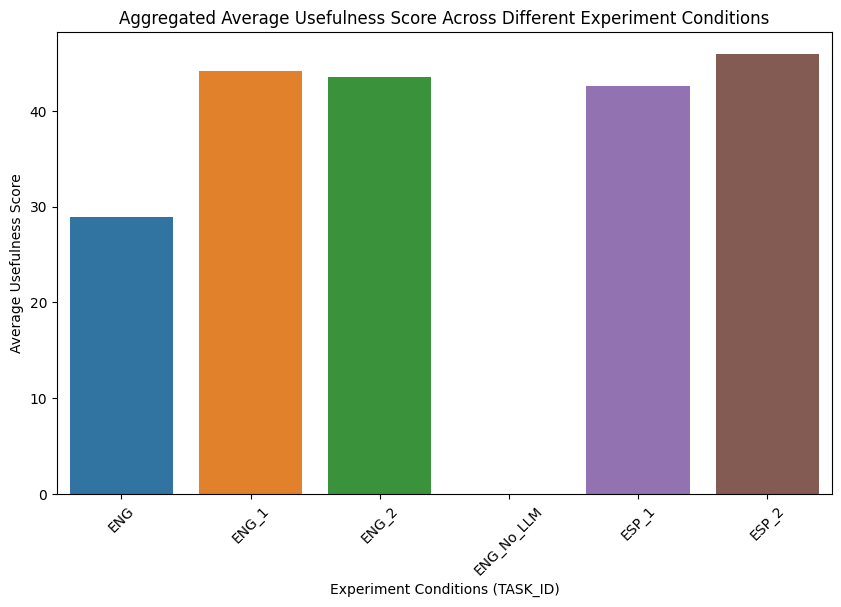

In [59]:
features = ["FEAT_1", "FEAT_2", "FEAT_3", "FEAT_4", "FEAT_5", "FEAT_6", "FEAT_7", "FEAT_8"]

# Calculate the average usefulness score across all features for each TASK_ID
final_df['average_usefulness'] = final_df[features].mean(axis=1)

# Group by TASK_ID and calculate the mean of the average usefulness scores
grouped_df = final_df.groupby('TASK_ID')['average_usefulness'].mean().reset_index()

# Plot the aggregated average usefulness score across different TASK_IDs
plt.figure(figsize=(10, 6))
sns.barplot(x='TASK_ID', y='average_usefulness', data=grouped_df, errorbar=None)
plt.title('Aggregated Average Usefulness Score Across Different Experiment Conditions')
plt.ylabel('Average Usefulness Score')
plt.xlabel('Experiment Conditions (TASK_ID)')
plt.xticks(rotation=45)
plt.show()

In [61]:
for category, columns in categories.items():
    for column in columns:
        final_df[column] = pd.to_numeric(final_df[column], errors='coerce')

In [80]:
ownership = ["OWN_1", "OWN_2", "OWN_3"]
colab = ["COLAB_1", "COLAB_2", "COLAB_3"]
llm_prowess = ["LM_1", "LM_2", "LM_3", "LM_4"]
likert_cols = ownership + colab + llm_prowess + ["TASK_ID"]

In [81]:
final_df[likert_cols]

,OWN_1,OWN_2,OWN_3,COLAB_1,COLAB_2,COLAB_3,LM_1,LM_2,LM_3,LM_4,TASK_ID
0,1,2,1,4,5,2,5,5,5,5,ENG
1,5,2,4,4,4,4,4,5,4,4,ENG
2,4,2,2,4,5,3,3,4,4,4,ENG
3,3,5,1,4,3,4,4,5,5,4,ENG
4,4,4,4,5,5,2,4,4,4,4,ENG
...,...,...,...,...,...,...,...,...,...,...,...
91,4,4,4,0,0,0,0,0,0,0,ENG_No_LLM
92,5,5,5,0,0,0,0,0,0,0,ENG_No_LLM
93,5,5,5,0,0,0,0,0,0,0,ENG_No_LLM
94,4,4,4,0,0,0,0,0,0,0,ENG_No_LLM


In [89]:
categories['Ownership']

['OWN_1', 'OWN_2', 'OWN_3']

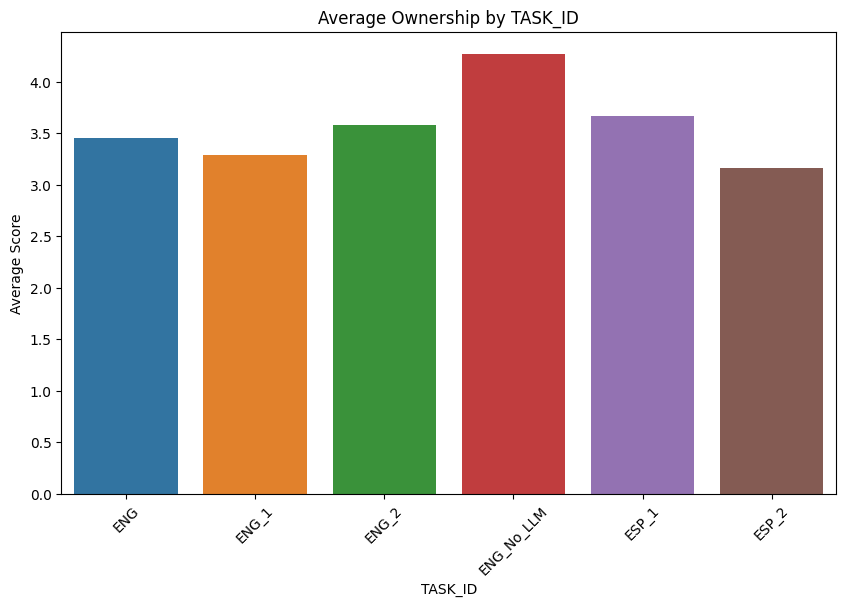

In [92]:
# Calculate the mean score for each category in 'Ownership' by TASK_ID
ownership_columns = categories['Ownership']

# Group by 'TASK_ID' and calculate the mean of the ownership columns
grouped_df_cat = final_df[ownership_columns + ['TASK_ID']].groupby('TASK_ID').mean().reset_index()

# Plot the results for the 'Ownership' category
plt.figure(figsize=(10, 6))

# Calculate the mean score for the 'Ownership' category by TASK_ID
category_mean = grouped_df_cat[ownership_columns].mean(axis=1)

sns.barplot(x=grouped_df_cat['TASK_ID'], y=category_mean, errorbar=None)
plt.title('Average Ownership by TASK_ID')
plt.ylabel('Average Score')
plt.xlabel('TASK_ID')
plt.xticks(rotation=45)
plt.show()


In [93]:
categories

{'Ownership': ['OWN_1', 'OWN_2', 'OWN_3'],
 'Benefits of Co-writing': ['COLAB_1', 'COLAB_2', 'COLAB_3'],
 'LLM Prowess': ['LM_1', 'LM_2', 'LM_3', 'LM_4']}

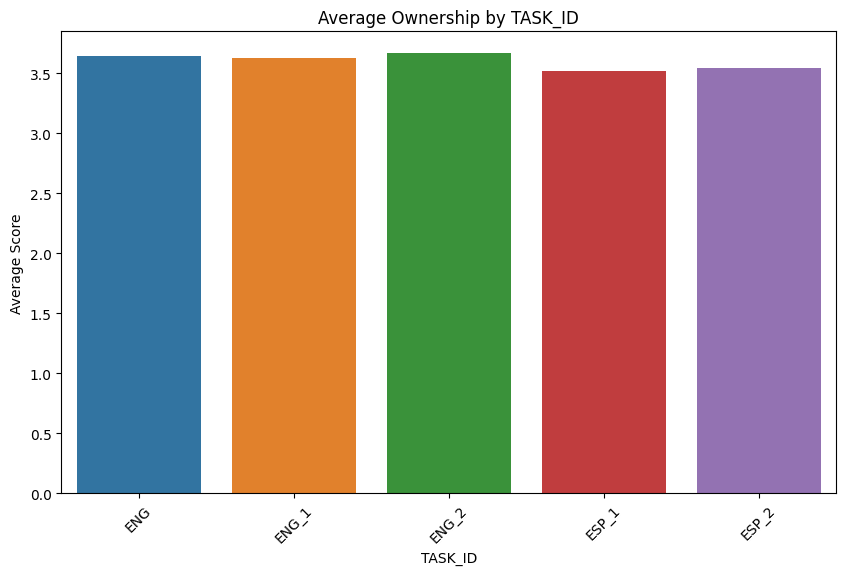

In [94]:
# Calculate the mean score for each category in 'Ownership' by TASK_ID
cowriting_cols = categories['Benefits of Co-writing']

# Group by 'TASK_ID' and calculate the mean of the ownership columns

grouped_df_cat = final_df[cowriting_cols + ['TASK_ID']].groupby('TASK_ID').mean().reset_index()
grouped_df_cat = grouped_df_cat[grouped_df_cat['TASK_ID']!='ENG_No_LLM']
# Plot the results for the 'Ownership' category
plt.figure(figsize=(10, 6))

# Calculate the mean score for the 'Ownership' category by TASK_ID
category_mean = grouped_df_cat[cowriting_cols].mean(axis=1)

sns.barplot(x=grouped_df_cat['TASK_ID'], y=category_mean, errorbar=None)
plt.title('Average Ownership by TASK_ID')
plt.ylabel('Average Score')
plt.xlabel('TASK_ID')
plt.xticks(rotation=45)
plt.show()


In [97]:
final_df[llm_prowess_cols + ['TASK_ID']]

,LM_1,LM_2,LM_3,LM_4,TASK_ID
0,5,5,5,5,ENG
1,4,5,4,4,ENG
2,3,4,4,4,ENG
3,4,5,5,4,ENG
4,4,4,4,4,ENG
...,...,...,...,...,...
91,0,0,0,0,ENG_No_LLM
92,0,0,0,0,ENG_No_LLM
93,0,0,0,0,ENG_No_LLM
94,0,0,0,0,ENG_No_LLM


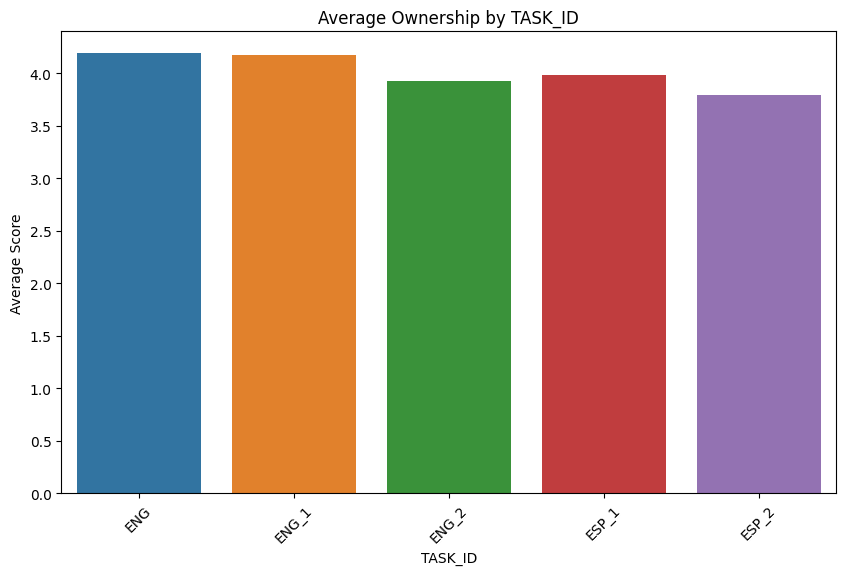

In [98]:
# Calculate the mean score for each category in 'Ownership' by TASK_ID
llm_prowess_cols = categories['LLM Prowess']

# Group by 'TASK_ID' and calculate the mean of the ownership columns

grouped_df_cat = final_df[llm_prowess_cols + ['TASK_ID']].groupby('TASK_ID').mean().reset_index()
grouped_df_cat = grouped_df_cat[grouped_df_cat['TASK_ID']!='ENG_No_LLM']
# Plot the results for the 'Ownership' category
plt.figure(figsize=(10, 6))

# Calculate the mean score for the 'Ownership' category by TASK_ID
category_mean = grouped_df_cat[llm_prowess_cols].mean(axis=1)

sns.barplot(x=grouped_df_cat['TASK_ID'], y=category_mean, errorbar=None)
plt.title('Average Ownership by TASK_ID')
plt.ylabel('Average Score')
plt.xlabel('TASK_ID')
plt.xticks(rotation=45)
plt.show()


# Activity

In [99]:
from collections import Counter


In [100]:
master_activity_df

,_id,document_id,task_id,prolific_id,activity_log,time_spent_outside,timestamp,study_id,TASK_ID
0,66c5a24c86c57a87db6f59e3,66c5a13c86c57a87db6f59d9,main_task_1,5a4ff22bacc75b000179b0e9,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-21 08:16:12.414000+00:00,66c516b1d61c7b572205f713,ENG
1,66c5e8072f44d7b54f76e537,66c5e4be2f44d7b54f76e52d,main_task_1,5c068f1f9d0df40001e5688c,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-21 13:13:43.830000+00:00,66c516b1d61c7b572205f713,ENG
2,66c5a2ec86c57a87db6f59ed,66c5a21086c57a87db6f59e1,main_task_1,5c62de3f48fe4e000180e09d,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-21 08:18:52.061000+00:00,66c516b1d61c7b572205f713,ENG
3,66c88800e46942c099b32394,66c88773e46942c099b32393,main_task_1,5d1f9776676cd1001580ae9c,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-23 13:00:48.591000+00:00,66c516b1d61c7b572205f713,ENG
4,66c5a5c486c57a87db6f5a00,66c5a3e386c57a87db6f59f9,main_task_1,5ea9a41b87b4150bf9634637,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-21 08:31:00.305000+00:00,66c516b1d61c7b572205f713,ENG
...,...,...,...,...,...,...,...,...,...
91,66c9e020925382be577189bb,66c9dc59925382be577189b5,main_task_1,60897f81d4a682307c628739,"{'buttonClicks': [], 'generatedContent': [], '...",12800,2024-08-24 13:29:04.194000+00:00,66c90fcc4541f87369be0127,ENG_No_LLM
92,66c9e04f925382be577189be,66c9dbe4925382be577189af,main_task_1,66a3b18c58afbaf406f6ed4a,"{'buttonClicks': [], 'generatedContent': [], '...",12560,2024-08-24 13:29:51.324000+00:00,66c90fcc4541f87369be0127,ENG_No_LLM
93,66c9e11b925382be577189c1,66c9da27925382be5771899c,main_task_1,6676842beee8713bc1b33408,"{'buttonClicks': [], 'generatedContent': [], '...",12750,2024-08-24 13:33:15.492000+00:00,66c90fcc4541f87369be0127,ENG_No_LLM
94,66c9f25b925382be577189c9,66c9f03a925382be577189c6,main_task_1,5efc4a5bed804f20d1c1b0f4,"{'buttonClicks': [], 'generatedContent': [], '...",0,2024-08-24 14:46:51.777000+00:00,66c90fcc4541f87369be0127,ENG_No_LLM


In [103]:
# master_activity_df['activity_log'] = master_activity_df['activity_log'].apply(ast.literal_eval)
master_activity_df[master_activity_df['TASK_ID']!='ENG_No_LLM']

,_id,document_id,task_id,prolific_id,activity_log,time_spent_outside,timestamp,study_id,TASK_ID
0,66c5a24c86c57a87db6f59e3,66c5a13c86c57a87db6f59d9,main_task_1,5a4ff22bacc75b000179b0e9,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-21 08:16:12.414000+00:00,66c516b1d61c7b572205f713,ENG
1,66c5e8072f44d7b54f76e537,66c5e4be2f44d7b54f76e52d,main_task_1,5c068f1f9d0df40001e5688c,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-21 13:13:43.830000+00:00,66c516b1d61c7b572205f713,ENG
2,66c5a2ec86c57a87db6f59ed,66c5a21086c57a87db6f59e1,main_task_1,5c62de3f48fe4e000180e09d,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-21 08:18:52.061000+00:00,66c516b1d61c7b572205f713,ENG
3,66c88800e46942c099b32394,66c88773e46942c099b32393,main_task_1,5d1f9776676cd1001580ae9c,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-23 13:00:48.591000+00:00,66c516b1d61c7b572205f713,ENG
4,66c5a5c486c57a87db6f5a00,66c5a3e386c57a87db6f59f9,main_task_1,5ea9a41b87b4150bf9634637,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-21 08:31:00.305000+00:00,66c516b1d61c7b572205f713,ENG
...,...,...,...,...,...,...,...,...,...
75,66c7429e6db9c208f260cbec,66c742626db9c208f260cbeb,main_task_1,63ed9dbc1c7838ffcbb42142,"{'buttonClicks': [], 'generatedContent': [{'fe...",3772,2024-08-22 13:52:30.481000+00:00,66c63f502b78911af098063d,ENG_2
76,66c74f856db9c208f260cc0f,66c74f216db9c208f260cc0c,main_task_2,60c101e4634ffb1aa797b924,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-22 14:47:33.899000+00:00,66c63f502b78911af098063d,ESP_1
77,66c7519f6db9c208f260cc1c,66c750f16db9c208f260cc18,main_task_1,60c101e4634ffb1aa797b924,{'buttonClicks': [{'action': 'CREATE CONTINUAT...,0,2024-08-22 14:56:31.836000+00:00,66c63f502b78911af098063d,ENG_2
78,66c758d46db9c208f260cc33,66c757f06db9c208f260cc32,main_task_2,6549030c68f0146d7216bb1c,"{'buttonClicks': [], 'generatedContent': [], '...",0,2024-08-22 15:27:16.063000+00:00,66c63f502b78911af098063d,ESP_1


In [145]:
button_clicks_data = []

# Loop through each row in master_activity_df
for _, row in master_activity_df.iterrows():
    task_id = row['TASK_ID']
    activity_log = row['activity_log']
    study_id = row['study_id']
    # Extract buttonClicks from activity_log
    button_clicks = activity_log.get('buttonClicks', [])
    
    # Count the button click actions
    button_clicks_count = Counter([click['action'] for click in button_clicks])
    
    # Store the task_id and button_clicks_count in the list
    for action, count in button_clicks_count.items():
        button_clicks_data.append({
            'task_id': task_id,
            'study_id': study_id,
            'action': action,
            'count': count
        })

# Convert the list to a DataFrame
button_clicks_df = pd.DataFrame(button_clicks_data)

In [143]:
# task_name_mapping

{('66c516b1d61c7b572205f713', 'main_task_1'): 'EN',
 ('66c5e9afb11bf5c62a286fe8', 'main_task_1'): 'ENG1',
 ('66c5e9afb11bf5c62a286fe8', 'main_task_2'): 'ESP2',
 ('66c616da5ea4ebca7f461ac7', 'main_task_1'): 'ENG1',
 ('66c616da5ea4ebca7f461ac7', 'main_task_2'): 'ESP2',
 ('66c63f4f7c3e886b7c9cc498', 'main_task_1'): 'ENG2',
 ('66c63f4f7c3e886b7c9cc498', 'main_task_2'): 'ESP1',
 ('66c63f502b78911af098063d', 'main_task_1'): 'ENG2',
 ('66c63f502b78911af098063d', 'main_task_2'): 'ESP1'}

In [131]:
# button_clicks_df['task_id'] = button_clicks_df.apply(
#     lambda x: task_name_mapping.get((x['study_id'], x['task_id']), x['task_id']),
#     axis=1
# )

In [146]:
button_clicks_df['action'].unique()

array(['CREATE VARIATION', 'recipe_Gain_Anecdotal', 'recipe_LongTerm',
       'recipe_Loss_Statistics', 'recipe_Gain_Statistics',
       'recipe_ShortTerm', 'recipe_Loss_Anecdotal', 'CREATE CONTINUATION',
       'DELETE CHUNK', 'DELETE VERSION', 'Make it emotional',
       'Recipe Created: recipe_Kn8KX', '', 'Recipe Created: recipe_wVuAf',
       'make it emotional', 'Recipe Created: recipe_rfQTt',
       'recipe_rfQTt', 'Recipe Created: recipe_Wd3O7', 'Add Statistics',
       'Recipe Created: recipe_GGNBL', 'recipe_GGNBL',
       'inicio conmovedor', 'Recipe Created: recipe_CrWa2',
       'endearing begining', 'Recipe Created: recipe_qexV3',
       'Recipe Created: recipe_nbdR2', 'make it convincing',
       'Recipe Created: recipe_eXeP5', 'Recipe Created: recipe_1kF0U',
       'hazlo mas emocional', 'Recipe Created: recipe_9kHb2',
       'añade statisticas', 'Recipe Created: recipe_ywDFt',
       'Capta la audiencia emocionalmente contando las consequencias de extinccion',
       'Re

In [147]:
grouped_button_clicks_df = button_clicks_df.groupby(['task_id', 'action'])['count'].sum().reset_index()


In [148]:
grouped_button_clicks_df['action'].unique()

array(['', 'CREATE CONTINUATION', 'CREATE VARIATION', 'DELETE CHUNK',
       'DELETE VERSION', 'Make it emotional',
       'Recipe Created: recipe_Kn8KX', 'Recipe Created: recipe_rfQTt',
       'Recipe Created: recipe_wVuAf', 'make it emotional',
       'recipe_Gain_Anecdotal', 'recipe_Gain_Statistics',
       'recipe_LongTerm', 'recipe_Loss_Anecdotal',
       'recipe_Loss_Statistics', 'recipe_ShortTerm', 'recipe_rfQTt',
       'Add Statistics', 'Recipe Created: recipe_GGNBL',
       'Recipe Created: recipe_Wd3O7', 'recipe_GGNBL',
       'Add how their donations will help', 'MAke it more emotional ',
       'Recipe Created: recipe_9LTcT', 'Recipe Created: recipe_LdbXD',
       'Recipe Created: recipe_eXeP5', 'Recipe Created: recipe_hzZ1j',
       'Recipe Created: recipe_jJfQ3', 'Recipe Created: recipe_lWLOH',
       'Recipe Created: recipe_nbdR2', 'Recipe Created: recipe_rUUyL',
       'add a sentence explaining how they contribute.',
       'add consequences', 'add consequences of ext

In [108]:
# fileterd_action = grouped_button_clicks_df[grouped_button_clicks_df['action'].isin(['CREATE CONTINUATION','recipe_Gain_Anecdotal','recipe_Gain_Statistics', 'recipe_LongTerm','recipe_Loss_Anecdotal', 'recipe_Loss_Statistics','recipe_ShortTerm'])]

In [150]:
allowed_actions = ['CREATE CONTINUATION', 'recipe_Gain_Anecdotal', 'recipe_Gain_Statistics',
                   'recipe_LongTerm', 'recipe_Loss_Anecdotal', 'recipe_Loss_Statistics',
                   'recipe_ShortTerm']

# grouped_button_clicks_df['filtered_action'] = grouped_button_clicks_df['action'].apply(
#     lambda x: x if x in allowed_actions else 'custom'
# )

In [151]:
filter_out_actions = grouped_button_clicks_df[
    
    ~grouped_button_clicks_df['action'].str.contains('CREATE VARIATION|DELETE CHUNK|DELETE VERSION')
]

In [152]:
filter_out_actions

,task_id,action,count
0,ENG,,1
1,ENG,CREATE CONTINUATION,13
5,ENG,Make it emotional,1
6,ENG,Recipe Created: recipe_Kn8KX,1
7,ENG,Recipe Created: recipe_rfQTt,1
...,...,...,...
97,ESP_2,recipe_Gain_Statistics,12
98,ESP_2,recipe_LongTerm,6
99,ESP_2,recipe_Loss_Anecdotal,6
100,ESP_2,recipe_Loss_Statistics,10


In [153]:
grouped_button_clicks_df['filtered_action'] = grouped_button_clicks_df['action'].apply(
    lambda x: x if x in allowed_actions else 'custom'
)

In [163]:
grouped_button_clicks_df

,task_id,action,count,filtered_action
0,ENG,,1,custom
1,ENG,CREATE CONTINUATION,13,CREATE CONTINUATION
2,ENG,CREATE VARIATION,26,custom
3,ENG,DELETE CHUNK,14,custom
4,ENG,DELETE VERSION,14,custom
...,...,...,...,...
97,ESP_2,recipe_Gain_Statistics,12,recipe_Gain_Statistics
98,ESP_2,recipe_LongTerm,6,recipe_LongTerm
99,ESP_2,recipe_Loss_Anecdotal,6,recipe_Loss_Anecdotal
100,ESP_2,recipe_Loss_Statistics,10,recipe_Loss_Statistics


In [170]:
button_clicks_final_count = grouped_button_clicks_df.groupby(['task_id','filtered_action'])['count'].sum().reset_index()
button_clicks_final_count

,task_id,filtered_action,count
0,ENG,CREATE CONTINUATION,13
1,ENG,custom,61
2,ENG,recipe_Gain_Anecdotal,31
3,ENG,recipe_Gain_Statistics,15
4,ENG,recipe_LongTerm,18
5,ENG,recipe_Loss_Anecdotal,12
6,ENG,recipe_Loss_Statistics,11
7,ENG,recipe_ShortTerm,13
8,ENG_1,CREATE CONTINUATION,10
9,ENG_1,custom,57


In [126]:
# fileterd_action = grouped_button_clicks_df = grouped_button_clicks_df[grouped_button_clicks_df['action'].isin(['CREATE CONTINUATION','recipe_Gain_Anecdotal','recipe_Gain_Statistics', 'recipe_LongTerm','recipe_Loss_Anecdotal', 'recipe_Loss_Statistics','recipe_ShortTerm'])]

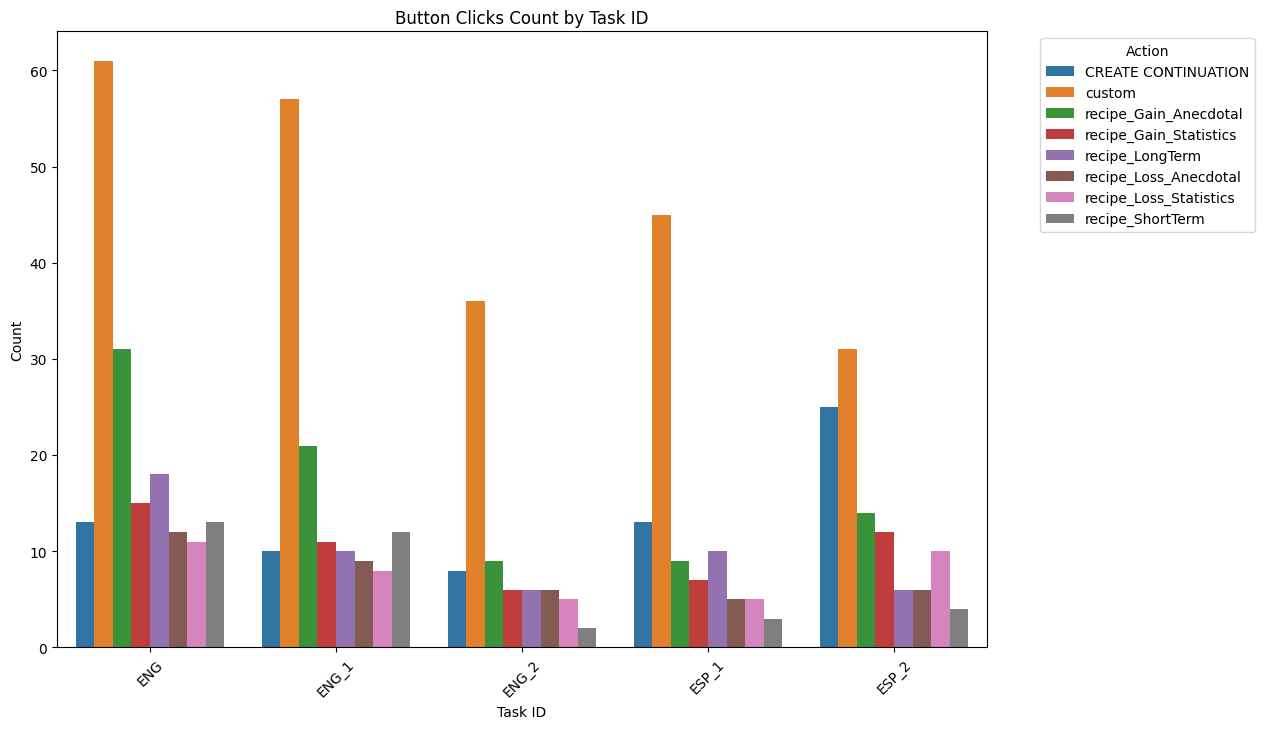

In [171]:
plt.figure(figsize=(12, 8))
sns.barplot(x='task_id', y='count', hue='filtered_action', data=button_clicks_final_count)
plt.title('Button Clicks Count by Task ID')
plt.ylabel('Count')
plt.xlabel('Task ID')
plt.xticks(rotation=45)
plt.legend(title='Action', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [612]:
button_clicks_final_count

,task_id,filtered_action,count
0,ENG,CREATE CONTINUATION,13
1,ENG,custom,61
2,ENG,recipe_Gain_Anecdotal,31
3,ENG,recipe_Gain_Statistics,15
4,ENG,recipe_LongTerm,18
5,ENG,recipe_Loss_Anecdotal,12
6,ENG,recipe_Loss_Statistics,11
7,ENG,recipe_ShortTerm,13
8,ENG_1,CREATE CONTINUATION,10
9,ENG_1,custom,57


In [172]:
import plotly.express as px
import pandas as pd

# Assuming grouped_button_clicks_df is already defined and contains 'task_id', 'count', and 'filtered_action' columns

# Create the bar plot using Plotly
fig = px.bar(
    button_clicks_final_count, 
    x='task_id', 
    y='count', 
    color='filtered_action',
    hover_data={'filtered_action': True, 'count': True, 'filtered_action': True},
    labels={'task_id': 'Task ID', 'count': 'Count', 'filtered_action': 'Action'},
    title='Button Clicks Count by Task ID'
)

# Customize the layout
fig.update_layout(
    xaxis_title='Task ID',
    yaxis_title='Count',
    legend_title='Action',
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1,
    width=900,
    height=600
)

# Rotate x-axis labels
fig.update_xaxes(tickangle=45)

# Show the plot
fig.show()


In [571]:
from difflib import SequenceMatcher
import ollama
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [186]:
# master_activity_df['task_id'] = master_activity_df.apply(
#     lambda x: task_name_mapping.get((x['study_id'], x['task_id']), x['task_id']),
#     axis=1
# )

In [572]:
content_usage = master_activity_df.merge(master_documents_df[["_id",'plain_text','word_count']], left_on='document_id', right_on='_id', how='inner').copy(deep=True)

In [573]:
content_usage

,_id_x,document_id,task_id,prolific_id,activity_log,time_spent_outside,timestamp,study_id,TASK_ID,_id_y,plain_text,word_count
0,66c5a24c86c57a87db6f59e3,66c5a13c86c57a87db6f59d9,main_task_1,5a4ff22bacc75b000179b0e9,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-21 08:16:12.414000+00:00,66c516b1d61c7b572205f713,ENG,66c5a13c86c57a87db6f59d9,Join hands with us in protecting our planet's ...,193
1,66c5e8072f44d7b54f76e537,66c5e4be2f44d7b54f76e52d,main_task_1,5c068f1f9d0df40001e5688c,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-21 13:13:43.830000+00:00,66c516b1d61c7b572205f713,ENG,66c5e4be2f44d7b54f76e52d,In a time of uncertainty for the future of our...,167
2,66c5a2ec86c57a87db6f59ed,66c5a21086c57a87db6f59e1,main_task_1,5c62de3f48fe4e000180e09d,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-21 08:18:52.061000+00:00,66c516b1d61c7b572205f713,ENG,66c5a21086c57a87db6f59e1,We are at a critical juncture where our inacti...,291
3,66c88800e46942c099b32394,66c88773e46942c099b32393,main_task_1,5d1f9776676cd1001580ae9c,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-23 13:00:48.591000+00:00,66c516b1d61c7b572205f713,ENG,66c88773e46942c099b32393,As you consider donating to the World Wildlife...,149
4,66c5a5c486c57a87db6f5a00,66c5a3e386c57a87db6f59f9,main_task_1,5ea9a41b87b4150bf9634637,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-21 08:31:00.305000+00:00,66c516b1d61c7b572205f713,ENG,66c5a3e386c57a87db6f59f9,\nThe World Wildlife Fund (WWF) is a beacon o...,156
...,...,...,...,...,...,...,...,...,...,...,...,...
91,66c9e020925382be577189bb,66c9dc59925382be577189b5,main_task_1,60897f81d4a682307c628739,"{'buttonClicks': [], 'generatedContent': [], '...",12800,2024-08-24 13:29:04.194000+00:00,66c90fcc4541f87369be0127,ENG_No_LLM,66c9dc59925382be577189b5,"Join us, the World Wild Life Organization in o...",87
92,66c9e04f925382be577189be,66c9dbe4925382be577189af,main_task_1,66a3b18c58afbaf406f6ed4a,"{'buttonClicks': [], 'generatedContent': [], '...",12560,2024-08-24 13:29:51.324000+00:00,66c90fcc4541f87369be0127,ENG_No_LLM,66c9dbe4925382be577189af,\nKnow About Willdlife\nWorldWild Life as a c...,93
93,66c9e11b925382be577189c1,66c9da27925382be5771899c,main_task_1,6676842beee8713bc1b33408,"{'buttonClicks': [], 'generatedContent': [], '...",12750,2024-08-24 13:33:15.492000+00:00,66c90fcc4541f87369be0127,ENG_No_LLM,66c9da27925382be5771899c,Join Us in Protecting Our Planet's Future\nAt ...,191
94,66c9f25b925382be577189c9,66c9f03a925382be577189c6,main_task_1,5efc4a5bed804f20d1c1b0f4,"{'buttonClicks': [], 'generatedContent': [], '...",0,2024-08-24 14:46:51.777000+00:00,66c90fcc4541f87369be0127,ENG_No_LLM,66c9f03a925382be577189c6,Do you sometimes look around and think just ho...,125


In [574]:
content_usage['generated'] = content_usage['activity_log'].apply(lambda x: x['generatedContent'])

In [575]:
content_usage['plain_text'].iloc[0]

"Join hands with us in protecting our planet's precious wildlife! The World Wildlife Fund (WWF) is a global organization dedicated to conserving nature and reducing the most pressing threats to the diversity of life on Earth. As a member, you'll be part of a community that shares your passion for preserving the natural world. Together, we can make a difference in the lives of countless species, from majestic elephants to tiny hummingbirds.\nBy joining WWF, you'll become part of a global movement that has already made a significant difference in the lives of countless species. For example, just last year, our conservation efforts helped increase the population of endangered sea turtles by 25% on a single island, thanks to the support of dedicated members like you who care about protecting our planet's precious wildlife!\nMembership benefits include: Exclusive updates on conservation projects and news from around the world, invitations to special events and webinars,\xa0 opportunities to

In [576]:
content_usage['generated'].iloc[0]

[{'feature': '@ai generation',
  'prompt': 'write an advert for WWF\ufeff',
  'response': "Join hands with us in protecting our planet's precious wildlife! The World Wildlife Fund (WWF) is a global organization dedicated to conserving nature and reducing the most pressing threats to the diversity of life on Earth.As a member, you'll be part of a community that shares your passion for preserving the natural world. Together, we can make a difference in the lives of countless species, from majestic elephants to tiny hummingbirds.Our work focuses on three key areas:1. **Conservation**: Protecting and restoring habitats, addressing climate change, and promoting sustainable development.2. **Education**: Inspiring people to take action through our educational programs, campaigns, and community engagement initiatives.3. **Empowerment**: Supporting local communities in managing their natural resources, ensuring that they benefit from conservation efforts.By joining WWF, you'll become part of a 

In [577]:
content_usage.iloc[0]

_id_x                                          66c5a24c86c57a87db6f59e3
document_id                                    66c5a13c86c57a87db6f59d9
task_id                                                     main_task_1
prolific_id                                    5a4ff22bacc75b000179b0e9
activity_log          {'buttonClicks': [{'action': 'CREATE VARIATION...
time_spent_outside                                                    0
timestamp                              2024-08-21 08:16:12.414000+00:00
study_id                                       66c516b1d61c7b572205f713
TASK_ID                                                             ENG
_id_y                                          66c5a13c86c57a87db6f59d9
plain_text            Join hands with us in protecting our planet's ...
word_count                                                          193
generated             [{'feature': '@ai generation', 'prompt': 'writ...
Name: 0, dtype: object


### Method 1: Simple Average Similarity

This method calculates the average cosine similarity between the AI-generated content and the final text for each `task_id`.

**Formula:**

$$
\text{Average Similarity} = \frac{1}{n} \sum_{i=1}^{n} \text{cosine\_similarity}(F_i, F)
$$

Where:
- \( n \) is the number of AI-generated segments.
- $ F_i $ is the embedding for the AI-generated segment.
- \( F \) is the embedding for the final document.


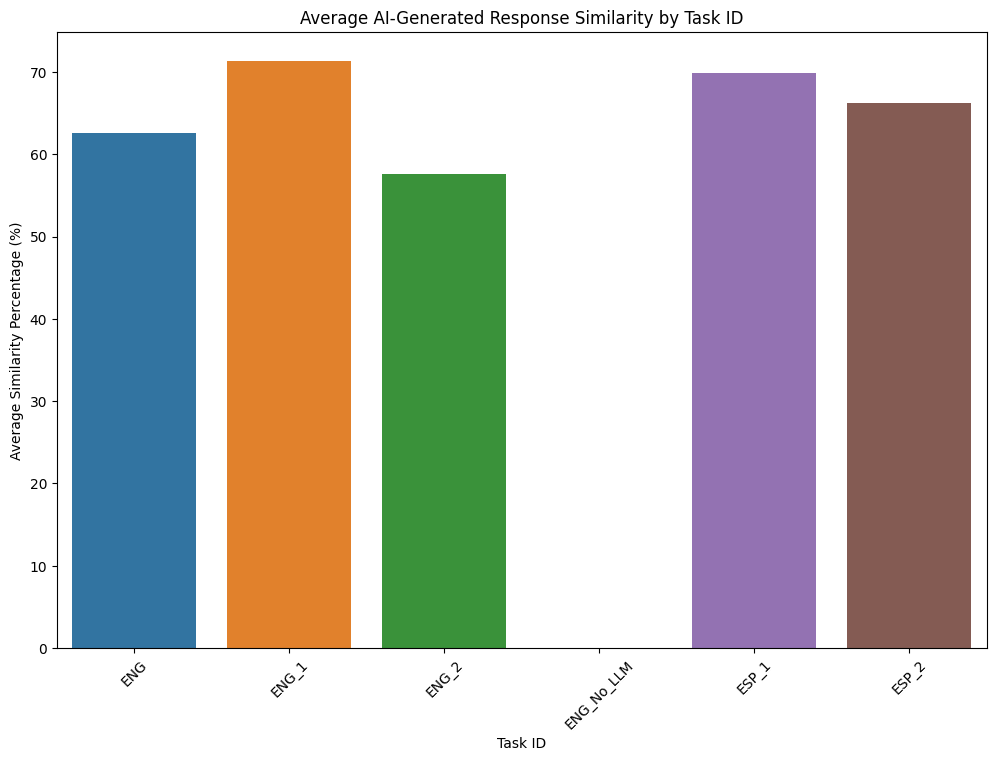

In [569]:
def calculate_average_similarity(plain_text, generated_content, model):
    plain_text_embedding = model.encode([plain_text])
    
    similarities = []
    for content in generated_content:
        response = content.get('response')
        if response:
            response_embedding = model.encode([response])
            similarity = cosine_similarity(plain_text_embedding, response_embedding)[0][0]
            similarities.append(similarity)
    
    if similarities:
        return np.mean(similarities) * 100  # Convert to percentage
    else:
        return 0

# Example usage across task_ids
average_similarity_results = []

for _, row in content_usage.iterrows():
    plain_text = row['plain_text']
    generated_content = row['generated']
    
    average_similarity = calculate_average_similarity(plain_text, generated_content, model)
    average_similarity_results.append(average_similarity)

# Add to DataFrame and group by TASK_ID
content_usage['average_similarity'] = average_similarity_results
grouped_similarity = content_usage.groupby('TASK_ID')['average_similarity'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='TASK_ID', y='average_similarity', data=grouped_similarity, errorbar="sd")
plt.title('Average AI-Generated Response Similarity by Task ID')
plt.ylabel('Average Similarity Percentage (%)')
plt.xlabel('Task ID')
plt.xticks(rotation=45)
plt.show()



### Method 2: Weighted Average Similarity

This approach gives more weight to AI-generated segments that are longer or more critical in the text.

**Formula:**

$$
\text{Weighted Average Similarity} = \frac{\sum_{i=1}^{n} w_i \times \text{cosine\_similarity}(F_i, F)}{\sum_{i=1}^{n} w_i}
$$

Where:
- $ w_i $ is the weight for the \( i \)-th AI-generated segment (e.g., its length relative to the total length of final document).
The weight \( w_i \) for each AI-generated segment should be calculated as:

$$
w_i = \frac{\text{length of AI response}_i}{\text{length of final document}}
$$
- $ F_i $ and \( F \) are as defined above.





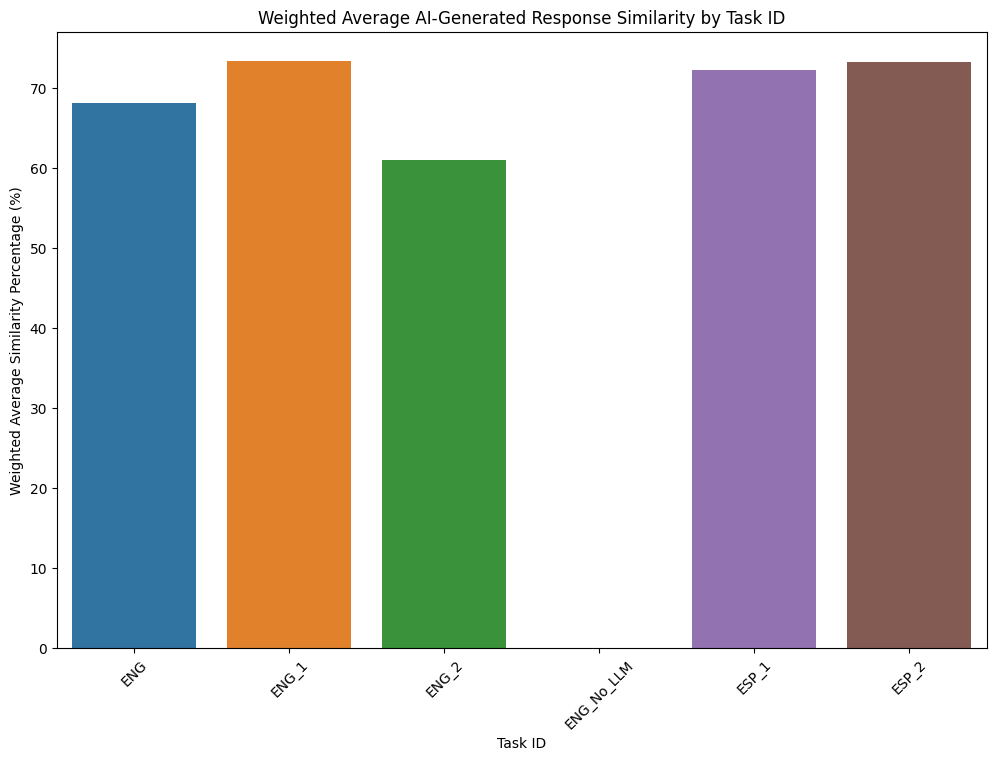

In [570]:
def calculate_weighted_average_similarity(plain_text, generated_content, model):
    plain_text_embedding = model.encode([plain_text])
    
    similarities = []
    weights = []
    total_length = len(plain_text.split())
    
    for content in generated_content:
        response = content.get('response')
        if response:
            response_embedding = model.encode([response])
            similarity = cosine_similarity(plain_text_embedding, response_embedding)[0][0]
            
            response_length = len(response.split())
            weight = response_length / total_length  # Relative weight
            
            similarities.append(similarity * weight)
            weights.append(weight)
    
    if weights:
        return np.sum(similarities) / np.sum(weights) * 100  # Convert to percentage
    else:
        return 0

# Example usage across task_ids
weighted_similarity_results = []

for _, row in content_usage.iterrows():
    plain_text = row['plain_text']
    generated_content = row['generated']
    
    weighted_similarity = calculate_weighted_average_similarity(plain_text, generated_content, model)
    weighted_similarity_results.append(weighted_similarity)

# Add to DataFrame and group by TASK_ID
content_usage['weighted_similarity'] = weighted_similarity_results
grouped_weighted_similarity = content_usage.groupby('TASK_ID')['weighted_similarity'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='TASK_ID', y='weighted_similarity', data=grouped_weighted_similarity, errorbar="sd")
plt.title('Weighted Average AI-Generated Response Similarity by Task ID')
plt.ylabel('Weighted Average Similarity Percentage (%)')
plt.xlabel('Task ID')
plt.xticks(rotation=45)
plt.show()


# embedding

In [239]:
# models = ['nomic-embed-text', 'mxbai-embed-large']


In [595]:
def calculate_cosine_similarity_ollama(content, response, model="nomic-embed-text"):
    if pd.isna(content) or pd.isna(response):
        return np.nan  # Return NaN if either content or response is NaN
    
    text1 = ollama.embeddings(model=model, prompt=content,)
    text2 = ollama.embeddings(model=model, prompt=response)
    
    
    vec1 = np.array(text1['embedding']).reshape(1, -1)
    vec2 = np.array(text2['embedding']).reshape(1, -1)
    # Split content and response into words
    # content_words = set(content.split())
    # response_words = set(response.split())
    
    # # Calculate the number of matching words
    # matching_words = content_words.intersection(response_words)
    
    # Calculate the percentage of matching words
    # return (len(matching_words) / len(content_words)) * 100 if len(content_words) > 0 else 0
    return cosine_similarity(vec1, vec2)[0][0]


## NOMIC ALL

In [260]:
average_similarity_results = []

# Loop through each row in content_usage DataFrame
for _, row in content_usage.iterrows():
    plain_text = row['plain_text']
    generated_content = row['generated']
    
    similarities = []
    
    # Loop through all generated contents
    for content in generated_content:
        ai_generation_response = content.get('response')
        
        if ai_generation_response:
            similarity = calculate_cosine_similarity(ai_generation_response, plain_text)
            if similarity is not None:
                similarities.append(similarity)
    
    # Calculate the average similarity for this row
    if similarities:
        average_similarity = np.mean(similarities)
    else:
        average_similarity = np.nan  # or 0 if you prefer
    
    # Store the result
    average_similarity_results.append(average_similarity)

# Add the average similarity results to the DataFrame
content_usage['similarity_score_nomic'] = average_similarity_results

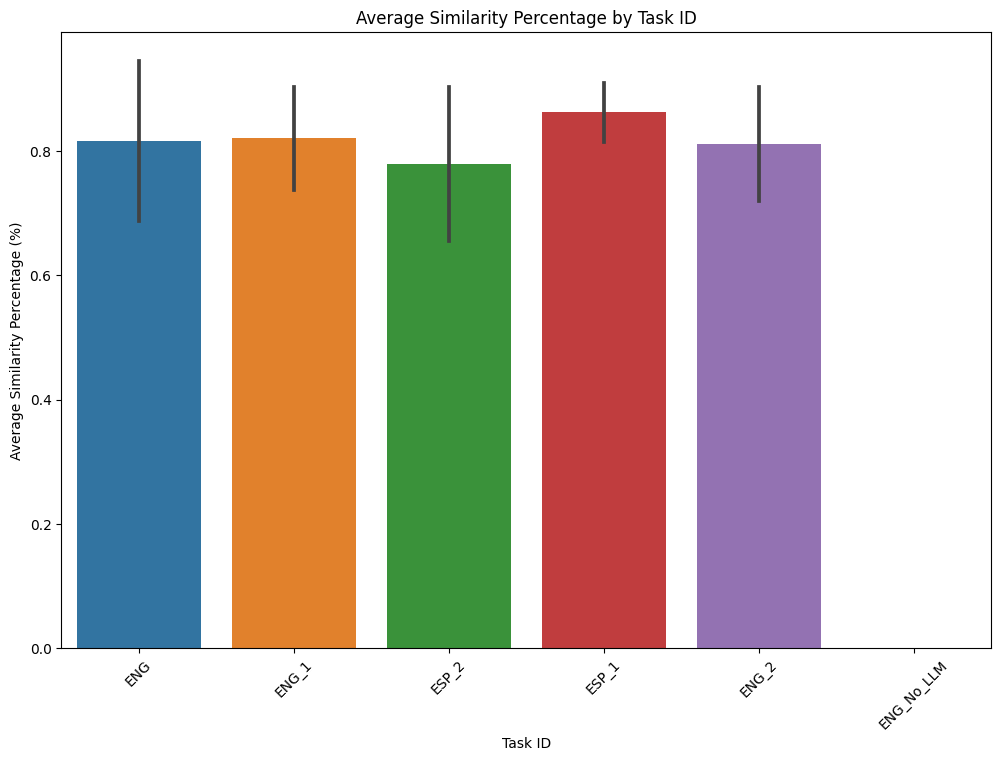

In [262]:
# average_similarity_by_task = content_usage.groupby('TASK_ID')['similarity_score_nomic'].mean().reset_index()

# Step 2a: Plot using Seaborn (static plot)
plt.figure(figsize=(12, 8))
sns.barplot(x='TASK_ID', y='similarity_score_nomic', data=content_usage, errorbar="sd")
plt.title('Average Similarity Percentage by Task ID')
plt.ylabel('Average Similarity Percentage (%)')
plt.xlabel('Task ID')
plt.xticks(rotation=45)
plt.show()

## NOMIC-@AI

In [248]:
average_similarity_results = []

# Loop through each row in content_usage DataFrame
for _, row in content_usage.iterrows():
    plain_text = row['plain_text']
    generated_content = row['generated']
    
    similarities = []
    
    # Loop through all generated contents
    for content in generated_content:
        ai_generation_response = content.get('response')
        
        if ai_generation_response and 'feature' in content and content['feature'] == '@ai generation':
            similarity = calculate_cosine_similarity(ai_generation_response, plain_text)
            if similarity is not None:
                similarities.append(similarity)
    
    # Calculate the average similarity for this row
    if similarities:
        average_similarity = np.mean(similarities)
    else:
        average_similarity = np.nan  # or 0 if you prefer
    
    # Store the result
    average_similarity_results.append(average_similarity)

# Add the average similarity results to the DataFrame
content_usage['similarity_score_only_ai_nomic'] = average_similarity_results

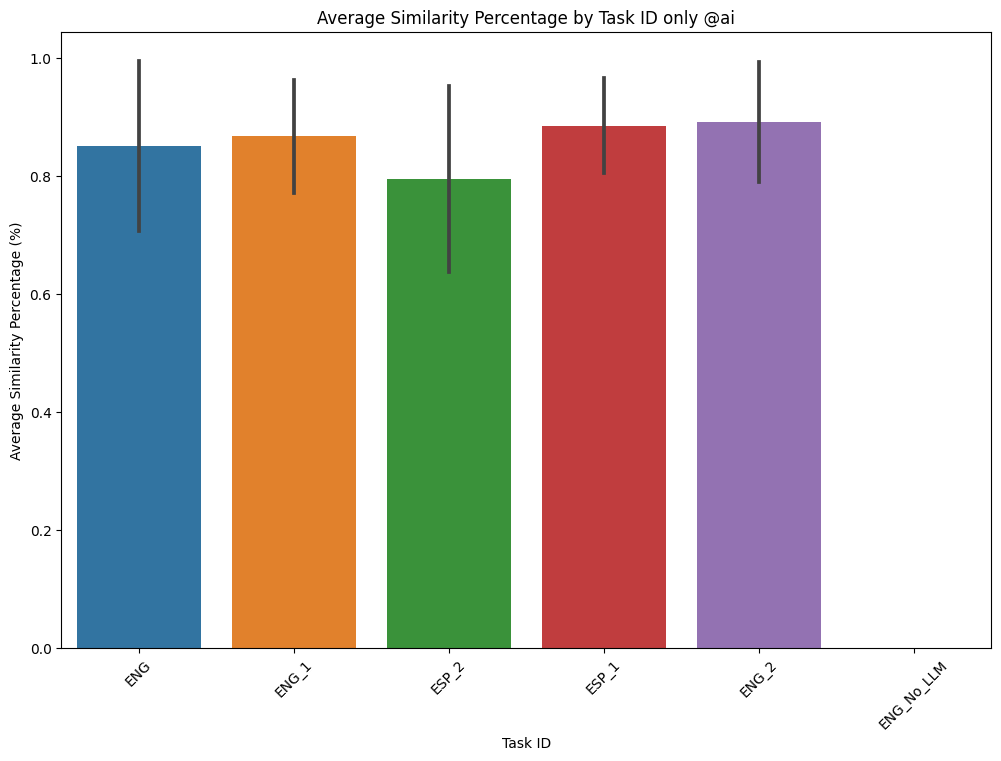

In [258]:
# average_similarity_by_task = content_usage.groupby('TASK_ID')['similarity_score_nomic'].mean().reset_index()

# Step 2a: Plot using Seaborn (static plot)
plt.figure(figsize=(12, 8))
sns.barplot(x='TASK_ID', y='similarity_score_only_ai_nomic', data=content_usage, errorbar="sd")
plt.title('Average Similarity Percentage by Task ID only @ai')
plt.ylabel('Average Similarity Percentage (%)')
plt.xlabel('Task ID')
plt.xticks(rotation=45)
plt.show()

## mxbai-embed-large-ALL

In [263]:
average_similarity_results = []

# Loop through each row in content_usage DataFrame
for _, row in content_usage.iterrows():
    plain_text = row['plain_text']
    generated_content = row['generated']
    
    similarities = []
    
    # Loop through all generated contents
    for content in generated_content:
        ai_generation_response = content.get('response')
        
        if ai_generation_response:
            similarity = calculate_cosine_similarity(ai_generation_response, plain_text, model="mxbai-embed-large")
            if similarity is not None:
                similarities.append(similarity)
    
    # Calculate the average similarity for this row
    if similarities:
        average_similarity = np.mean(similarities)
    else:
        average_similarity = np.nan  # or 0 if you prefer
    
    # Store the result
    average_similarity_results.append(average_similarity)

# Add the average similarity results to the DataFrame
content_usage['similarity_score_mxbai'] = average_similarity_results

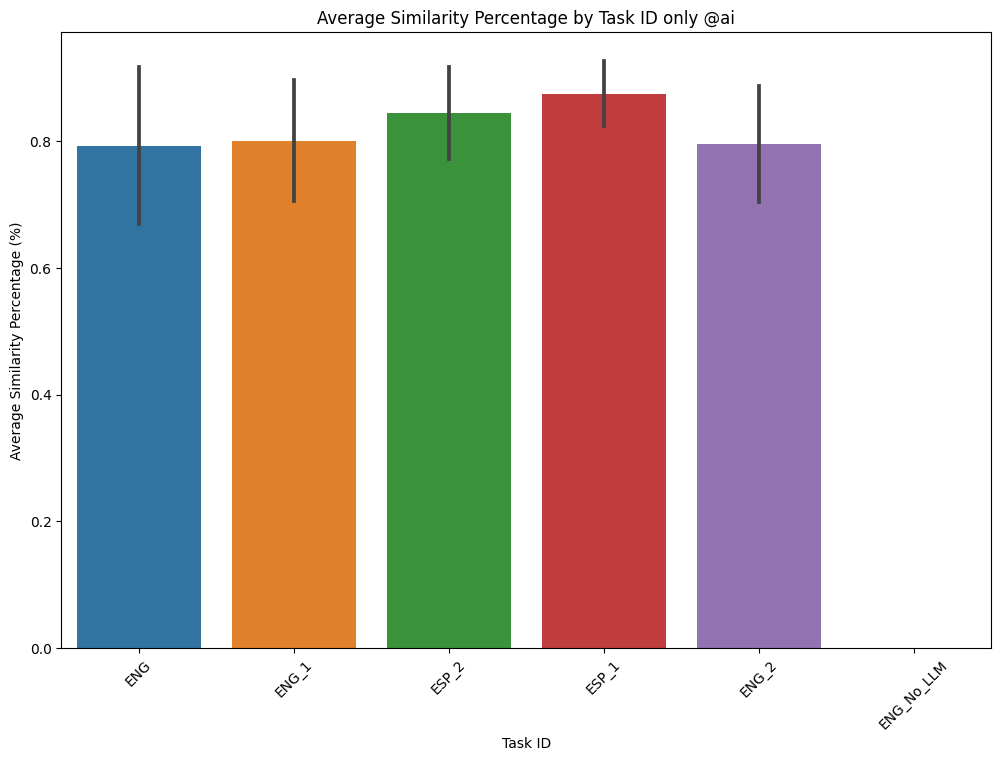

In [264]:
# average_similarity_by_task = content_usage.groupby('TASK_ID')['similarity_score_nomic'].mean().reset_index()

# Step 2a: Plot using Seaborn (static plot)
plt.figure(figsize=(12, 8))
sns.barplot(x='TASK_ID', y='similarity_score_mxbai', data=content_usage, errorbar="sd")
plt.title('Average Similarity Percentage by Task ID only @ai')
plt.ylabel('Average Similarity Percentage (%)')
plt.xlabel('Task ID')
plt.xticks(rotation=45)
plt.show()

## mxbai-embed-large-@ai

In [265]:
average_similarity_results = []

# Loop through each row in content_usage DataFrame
for _, row in content_usage.iterrows():
    plain_text = row['plain_text']
    generated_content = row['generated']
    
    similarities = []
    
    # Loop through all generated contents
    for content in generated_content:
        ai_generation_response = content.get('response')
        
        if ai_generation_response and 'feature' in content and content['feature'] == '@ai generation':
            similarity = calculate_cosine_similarity(ai_generation_response, plain_text, model="mxbai-embed-large")
            if similarity is not None:
                similarities.append(similarity)
    
    # Calculate the average similarity for this row
    if similarities:
        average_similarity = np.mean(similarities)
    else:
        average_similarity = np.nan  # or 0 if you prefer
    
    # Store the result
    average_similarity_results.append(average_similarity)

# Add the average similarity results to the DataFrame
content_usage['similarity_score_only_ai_mxbai'] = average_similarity_results

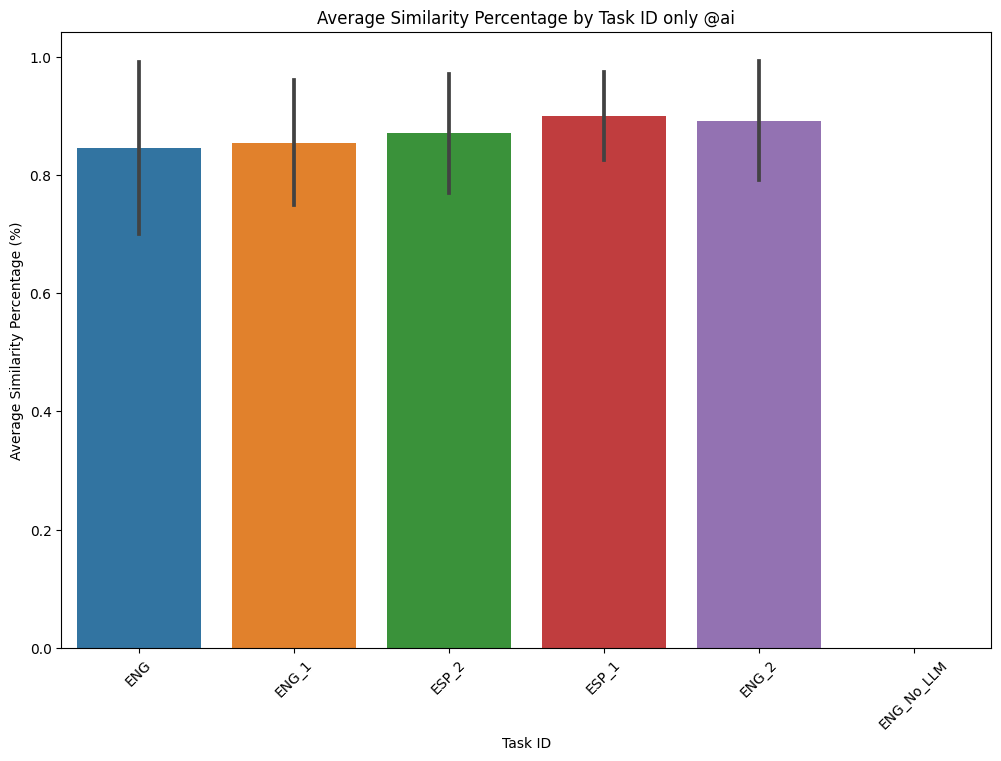

In [266]:
# average_similarity_by_task = content_usage.groupby('TASK_ID')['similarity_score_nomic'].mean().reset_index()

# Step 2a: Plot using Seaborn (static plot)
plt.figure(figsize=(12, 8))
sns.barplot(x='TASK_ID', y='similarity_score_only_ai_mxbai', data=content_usage, errorbar="sd")
plt.title('Average Similarity Percentage by Task ID only @ai')
plt.ylabel('Average Similarity Percentage (%)')
plt.xlabel('Task ID')
plt.xticks(rotation=45)
plt.show()

## sentence transformer

In [ ]:
!pip install -U sentence-transformers


In [268]:
from sentence_transformers import SentenceTransformer

c:\Users\shrey\anaconda3\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning:

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)



In [269]:

sentences = ["This is an example sentence", "Each sentence is converted"]

model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
embeddings = model.encode(sentences)
print(embeddings)

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.12k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

[[ 0.18845686  0.17425634  0.05447777  0.2905176   0.16766416 -0.04720677
   0.6455802   0.15980892  0.22689243 -0.03089058  0.2558835  -0.05258777
  -0.22610143 -0.05710634  0.13042629  0.12495352  0.3174962   0.19444394
  -0.5863255  -0.01258592  0.60990924  0.16432737  0.03331118 -0.27383074
  -0.28975758 -0.21119717 -0.02261386 -0.17035913  0.16159011  0.06082738
  -0.24162422  0.18579197  0.4274095   0.19295175 -0.07234459  0.16611087
   0.10442809  0.20477232  0.21116722  0.19973992 -0.09408259 -0.17383674
   0.06427369  0.28025478 -0.29530588  0.0620954   0.10427692 -0.02364416
   0.12913173 -0.1261746  -0.17898999  0.03700567 -0.61250603  0.05029811
   0.17730366  0.22494127  0.1738606  -0.03840292 -0.21286818  0.25849247
  -0.12101644  0.30971518 -0.41966382  0.00907665  0.14188907 -0.30556944
   0.17621139 -0.07087354 -0.62033135  0.67708355  0.01723747  0.18405117
  -0.16785778  0.20452642 -0.14770274 -0.06175366  0.63017434  0.11120185
   0.05153056  0.15927422 -0.05370888 

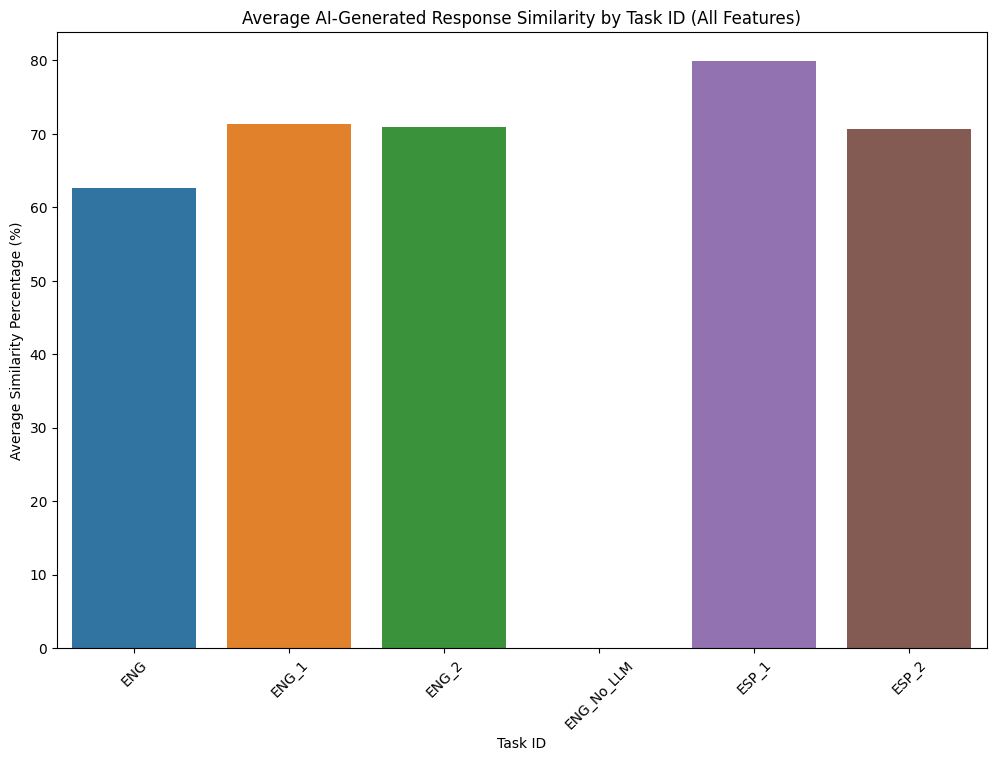

In [270]:
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

def calculate_similarity_percentage_ST(plain_text, generated_content, model):
    # Get the embedding for the plain_text
    plain_text_embedding = model.encode([plain_text])
    
    # List to store individual cosine similarities
    similarities = []
    
    # Calculate similarity for each AI-generated content
    for content in generated_content:
        response = content.get('response')
        if response:
            response_embedding = model.encode([response])
            similarity = cosine_similarity(plain_text_embedding, response_embedding)[0][0]
            similarities.append(similarity)
    
    # Calculate the average similarity for this row
    if similarities:
        average_similarity = np.mean(similarities)
    else:
        average_similarity = np.nan
    
    # Convert to percentage
    similarity_percentage = average_similarity * 100
    
    return similarity_percentage

# Apply the function to the DataFrame for all AI-generated content
content_usage['all_feature_similarity'] = content_usage.apply(
    lambda row: calculate_similarity_percentage_ST(row['plain_text'], row['generated'], model), axis=1
)

# Calculate the average similarity by TASK_ID
grouped_similarity_all = content_usage.groupby('TASK_ID')['all_feature_similarity'].mean().reset_index()

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x='TASK_ID', y='all_feature_similarity', data=grouped_similarity_all, errorbar="sd")
plt.title('Average AI-Generated Response Similarity by Task ID (All Features)')
plt.ylabel('Average Similarity Percentage (%)')
plt.xlabel('Task ID')
plt.xticks(rotation=45)
plt.show()


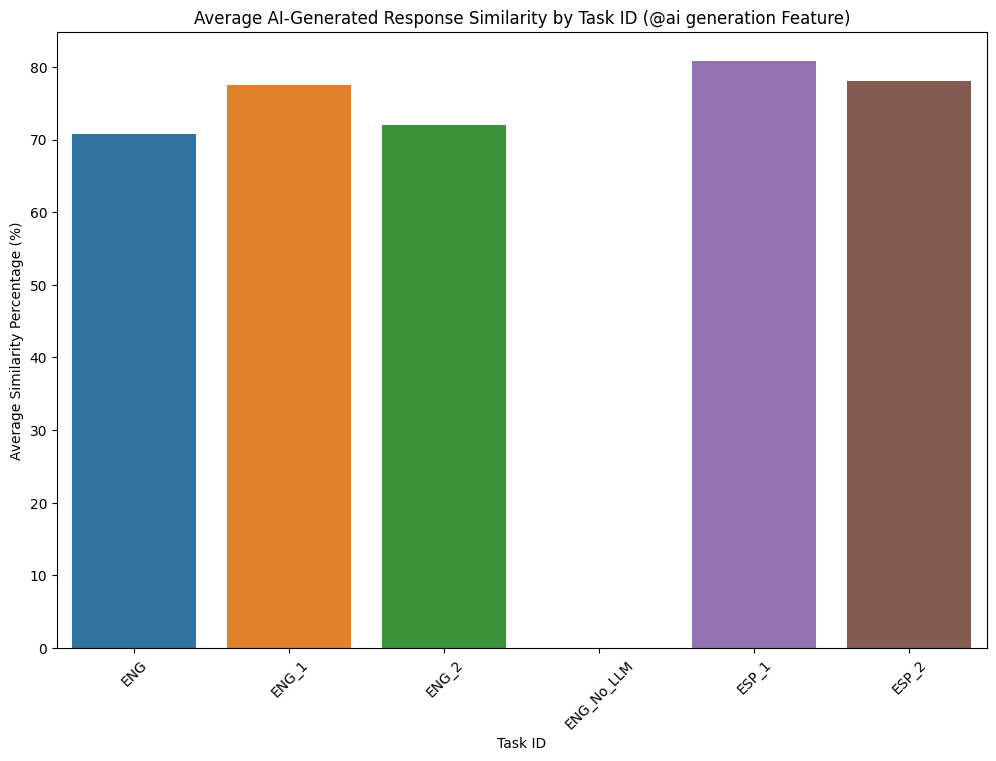

In [271]:
def calculate_ai_feature_similarity_percentage(plain_text, generated_content, model):
    # Get the embedding for the plain_text
    plain_text_embedding = model.encode([plain_text])
    
    # List to store individual cosine similarities
    similarities = []
    
    # Calculate similarity for each AI-generated content with @ai generation feature
    for content in generated_content:
        if content.get('feature') == '@ai generation':
            response = content.get('response')
            if response:
                response_embedding = model.encode([response])
                similarity = cosine_similarity(plain_text_embedding, response_embedding)[0][0]
                similarities.append(similarity)
    
    # Calculate the average similarity for this row
    if similarities:
        average_similarity = np.mean(similarities)
    else:
        average_similarity = np.nan
    
    # Convert to percentage
    similarity_percentage = average_similarity * 100
    
    return similarity_percentage

# Apply the function to the DataFrame for @ai generation feature
content_usage['@ai_feature_similarity'] = content_usage.apply(
    lambda row: calculate_ai_feature_similarity_percentage(row['plain_text'], row['generated'], model), axis=1
)

# Calculate the average similarity by TASK_ID
grouped_similarity_ai = content_usage.groupby('TASK_ID')['@ai_feature_similarity'].mean().reset_index()

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x='TASK_ID', y='@ai_feature_similarity', data=grouped_similarity_ai, errorbar="sd")
plt.title('Average AI-Generated Response Similarity by Task ID (@ai generation Feature)')
plt.ylabel('Average Similarity Percentage (%)')
plt.xlabel('Task ID')
plt.xticks(rotation=45)
plt.show()


## all embeddings

In [ ]:
sentence_transformer_model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')


In [585]:

# Step 1: Load the models

def sentence_transformer_embed_text(prompt):
    return sentence_transformer_model.encode([prompt])


# Placeholder functions to simulate embedding generation for hypothetical models
def nomic_embed_text(prompt):
    text = ollama.embeddings(model='nomic-embed-text', prompt=prompt,)
    return np.array(text['embedding']).reshape(1, -1)

def mxbai_embed_large(prompt):
    text = ollama.embeddings(model='mxbai-embed-large', prompt=prompt,)
    return np.array(text['embedding']).reshape(1, -1)

In [586]:
def calculate_average_similarity(plain_text, generated_content, embed_function):
    plain_text_embedding = embed_function(plain_text)
    
    similarities = []
    for content in generated_content:
        response = content.get('response')
        if response:
            response_embedding = embed_function(response)
            similarity = cosine_similarity(plain_text_embedding, response_embedding)[0][0]
            similarities.append(similarity)
    
    if similarities:
        return np.mean(similarities) * 100  # Convert to percentage
    else:
        return 0

def calculate_weighted_average_similarity(plain_text, generated_content, embed_function):
    plain_text_embedding = embed_function(plain_text)
    
    similarities = []
    weights = []
    total_length = len(plain_text.split())
    
    for content in generated_content:
        response = content.get('response')
        if response:
            response_embedding = embed_function(response)
            similarity = cosine_similarity(plain_text_embedding, response_embedding)[0][0]
            
            response_length = len(response.split())
            weight = response_length / total_length  # Relative weight
            
            similarities.append(similarity * weight)
            weights.append(weight)
    
    if weights:
        return np.sum(similarities) / np.sum(weights) * 100  # Convert to percentage
    else:
        return 0


### all embedding separate

In [ ]:
# Step 3: Define the models and their corresponding embedding functions
models = {
    'SentenceTransformer': sentence_transformer_embed_text,
    'nomic-embed-text': nomic_embed_text,
    'mxbai-embed-large': mxbai_embed_large,
}

results = []

for model_name, embed_function in models.items():
    average_similarity_results = []
    weighted_similarity_results = []
    
    for _, row in content_usage.iterrows():
        plain_text = row['plain_text']
        generated_content = row['generated']
        
        # Average similarity
        avg_similarity = calculate_average_similarity(plain_text, generated_content, embed_function)
        average_similarity_results.append(avg_similarity)
        
        # Weighted average similarity
        weighted_similarity = calculate_weighted_average_similarity(plain_text, generated_content, embed_function)
        weighted_similarity_results.append(weighted_similarity)
    
    # Store results in the DataFrame
    content_usage[f'average_similarity_{model_name}'] = average_similarity_results
    content_usage[f'weighted_similarity_{model_name}'] = weighted_similarity_results

# Step 4: Plot the results

for model_name in models.keys():
    # Group by TASK_ID for both average and weighted similarities
    grouped_avg_similarity = content_usage.groupby('TASK_ID')[f'average_similarity_{model_name}'].mean().reset_index()
    grouped_weighted_similarity = content_usage.groupby('TASK_ID')[f'weighted_similarity_{model_name}'].mean().reset_index()
    
    # Plot Average Similarity
    plt.figure(figsize=(12, 8))
    sns.barplot(x='TASK_ID', y=f'average_similarity_{model_name}', data=grouped_avg_similarity, errorbar="sd")
    plt.title(f'Average AI-Generated Response Similarity by Task ID ({model_name})')
    plt.ylabel('Average Similarity Percentage (%)')
    plt.xlabel('Task ID')
    plt.xticks(rotation=45)
    plt.show()
    
    # Plot Weighted Average Similarity
    plt.figure(figsize=(12, 8))
    sns.barplot(x='TASK_ID', y=f'weighted_similarity_{model_name}', data=grouped_weighted_similarity, errorbar="sd")
    plt.title(f'Weighted Average AI-Generated Response Similarity by Task ID ({model_name})')
    plt.ylabel('Weighted Average Similarity Percentage (%)')
    plt.xlabel('Task ID')
    plt.xticks(rotation=45)
    plt.show()


### all embedding together

In [600]:
avg_similarity_df = pd.melt(
    content_usage,
    id_vars=['TASK_ID'],
    value_vars=[
        'average_similarity_SentenceTransformer',
        'average_similarity_nomic-embed-text',
        'average_similarity_mxbai-embed-large'
    ],
    var_name='Model',
    value_name='Average Similarity (%)'
)

# Melt the DataFrame to long format for weighted average similarity
weighted_similarity_df = pd.melt(
    content_usage,
    id_vars=['TASK_ID'],
    value_vars=[
        'weighted_similarity_SentenceTransformer',
        'weighted_similarity_nomic-embed-text',
        'weighted_similarity_mxbai-embed-large'
    ],
    var_name='Model',
    value_name='Weighted Average Similarity (%)'
)

# Clean up the 'Model' column to only contain the model names

avg_similarity_df['Model'] = avg_similarity_df['Model'].str.replace('average_similarity_', '')
weighted_similarity_df['Model'] = weighted_similarity_df['Model'].str.replace('weighted_similarity_', '')


avg_similarity_df =  avg_similarity_df[avg_similarity_df['TASK_ID']!='ENG_No_LLM']
weighted_similarity_df =  weighted_similarity_df[weighted_similarity_df['TASK_ID']!='ENG_No_LLM']

avg_similarity_df = avg_similarity_df.groupby(['TASK_ID','Model'])['Average Similarity (%)'].mean().reset_index()
weighted_similarity_df = weighted_similarity_df.groupby(['TASK_ID','Model'])['Weighted Average Similarity (%)'].mean().reset_index()

# Step 2: Plot using Plotly

# Plot Average Similarity
fig_avg = px.bar(
    avg_similarity_df,
    x='TASK_ID',
    y='Average Similarity (%)',
    color='Model',
    title='Average AI-Generated Response Similarity by Task ID',
    labels={'TASK_ID': 'Task ID'},
    barmode='group'
)
fig_avg.update_layout(
    xaxis_title='Task ID',
    yaxis_title='Average Similarity Percentage (%)',
    width=900,
    height=600
)
fig_avg.show()

# Plot Weighted Average Similarity
fig_weighted = px.bar(
    weighted_similarity_df,
    x='TASK_ID',
    y='Weighted Average Similarity (%)',
    color='Model',
    title='Weighted Average AI-Generated Response Similarity by Task ID',
    labels={'TASK_ID': 'Task ID'},
    barmode='group'
)
fig_weighted.update_layout(
    xaxis_title='Task ID',
    yaxis_title='Weighted Average Similarity Percentage (%)',
    width=900,
    height=600
)
fig_weighted.show()

In [603]:
from scipy.stats import f_oneway

# Example: ANOVA for average similarity across TASK_IDs using SentenceTransformer
f_stat, p_value = f_oneway(
    *[content_usage[content_usage['TASK_ID'] == task_id]['average_similarity_SentenceTransformer'] for task_id in content_usage['TASK_ID'].unique() if task_id!='ENG_No_LLM']
)

print(f"ANOVA across TASK_IDs for SentenceTransformer: F-statistic = {f_stat}, p-value = {p_value}")


ANOVA across TASK_IDs for SentenceTransformer: F-statistic = 0.8254879736462011, p-value = 0.5130658190505115


In [608]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Example: Prepare data for Tukey’s HSD test
task_id_groups = content_usage[content_usage['TASK_ID']!='ENG_No_LLM'][['TASK_ID', 'average_similarity_SentenceTransformer']]
# task_id_groups[task_id_groups['TASK_ID']!='ENG_No_LLM']
# Perform Tukey’s HSD test
tukey_results = pairwise_tukeyhsd(
    endog=task_id_groups['average_similarity_SentenceTransformer'],
    groups=task_id_groups['TASK_ID'],
    alpha=0.05
)

print(tukey_results)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   ENG  ENG_1   8.6663 0.8531 -15.4814 32.8139  False
   ENG  ENG_2  -4.9803 0.9781 -29.1279 19.1674  False
   ENG  ESP_1   7.2484 0.9175 -16.8992 31.3961  False
   ENG  ESP_2   3.6379 0.9933 -20.5097 27.7856  False
 ENG_1  ENG_2 -13.6465 0.5149 -37.7942 10.5011  False
 ENG_1  ESP_1  -1.4178 0.9998 -25.5655 22.7298  False
 ENG_1  ESP_2  -5.0283 0.9773  -29.176 19.1193  False
 ENG_2  ESP_1  12.2287 0.6197 -11.9189 36.3763  False
 ENG_2  ESP_2   8.6182 0.8556 -15.5294 32.7659  False
 ESP_1  ESP_2  -3.6105 0.9935 -27.7581 20.5371  False
-----------------------------------------------------


In [604]:
from scipy.stats import kruskal

# Example: Kruskal-Wallis test for average similarity across TASK_IDs using SentenceTransformer
h_stat, p_value = kruskal(
    *[content_usage[content_usage['TASK_ID'] == task_id]['average_similarity_SentenceTransformer'] for task_id in content_usage['TASK_ID'].unique() if task_id!='ENG_No_LLM']
)

print(f"Kruskal-Wallis H test across TASK_IDs for SentenceTransformer: H-statistic = {h_stat}, p-value = {p_value}")


Kruskal-Wallis H test across TASK_IDs for SentenceTransformer: H-statistic = 4.416041549411377, p-value = 0.3526191820328826


# Generated Content Percentage

# Cumulative Similarity

In [272]:
aggregated_similarity = []

# Loop through each row in content_usage DataFrame
for _, row in content_usage.iterrows():
    document_id = row['document_id']
    plain_text = row['plain_text']
    generated_content = row['generated']
    task_id =  row['TASK_ID']
    # Initialize a variable to accumulate similarity scores
    total_similarity = 0
    
    # Loop through each generated content and calculate similarity
    for content in generated_content:
        response = content['response']
        similarity = calculate_cosine_similarity(response, plain_text)
        total_similarity += similarity
    
    # Store the aggregated similarity score for the document
    aggregated_similarity.append({
        'task_id': task_id,
        'document_id': document_id,
        'total_similarity': total_similarity
    })

In [567]:
pd.DataFrame(aggregated_similarity)

,task_id,document_id,total_similarity
0,ENG,66c5a13c86c57a87db6f59d9,4.480745
1,ENG,66c5e4be2f44d7b54f76e52d,6.439536
2,ENG,66c5a21086c57a87db6f59e1,6.732933
3,ENG,66c88773e46942c099b32393,3.659228
4,ENG,66c5a3e386c57a87db6f59f9,6.422402
...,...,...,...
91,ENG_No_LLM,66c9dc59925382be577189b5,0.000000
92,ENG_No_LLM,66c9dbe4925382be577189af,0.000000
93,ENG_No_LLM,66c9da27925382be5771899c,0.000000
94,ENG_No_LLM,66c9f03a925382be577189c6,0.000000


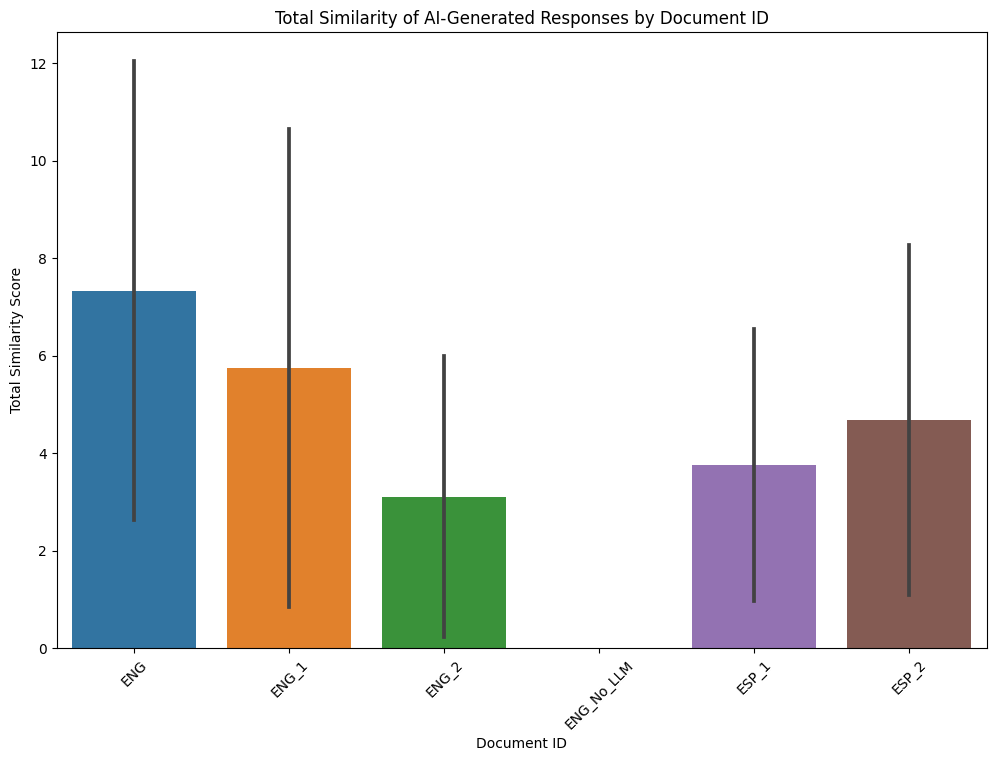

In [277]:
plt.figure(figsize=(12, 8))
sns.barplot(x='task_id', y='total_similarity', data=pd.DataFrame(aggregated_similarity).sort_values('task_id'), errorbar="sd")
plt.title('Total Similarity of AI-Generated Responses by Document ID')
plt.ylabel('Total Similarity Score')
plt.xlabel('Document ID')
plt.xticks(rotation=45)
plt.show()

      task_id  total_similarity
0         ENG          7.333162
1       ENG_1          5.748626
2       ENG_2          3.102787
3  ENG_No_LLM          0.000000
4       ESP_1          3.754609
5       ESP_2          4.672682


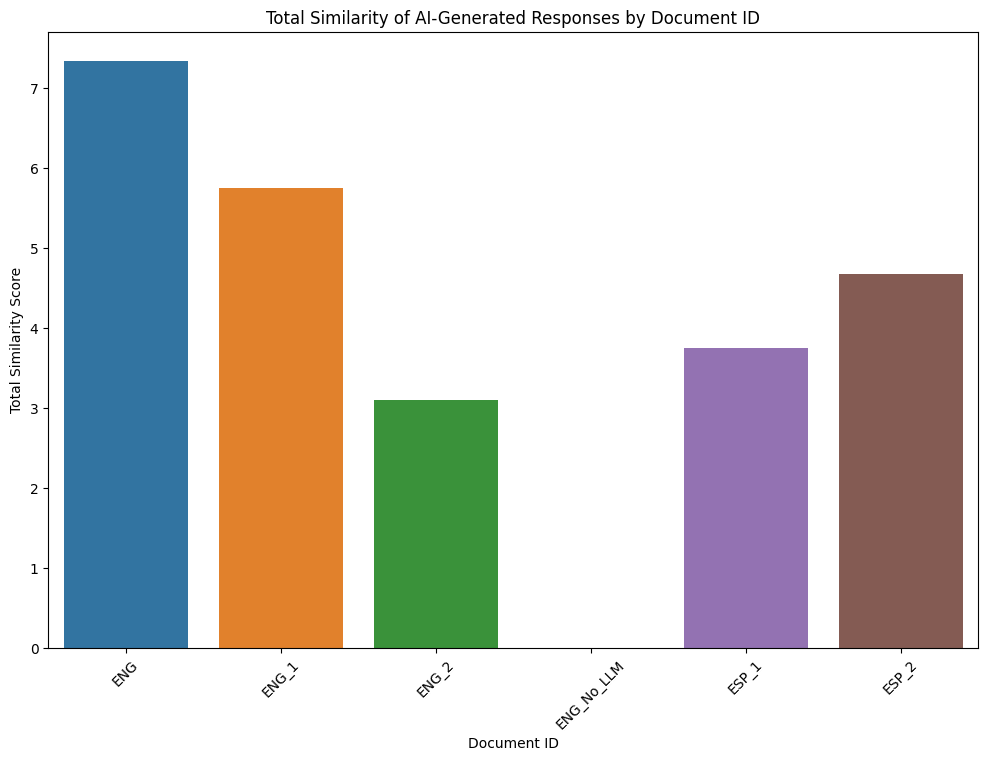

In [222]:
aggregated_similarity = []

# Loop through each row in content_usage DataFrame
for _, row in content_usage.iterrows():
    document_id = row['document_id']
    plain_text = row['plain_text']
    generated_content = row['generated']
    task_id =  row['TASK_ID']
    # Initialize a variable to accumulate similarity scores
    total_similarity = 0
    
    # Loop through each generated content and calculate similarity
    for content in generated_content:
        response = content['response']
        similarity = calculate_cosine_similarity(response, plain_text)
        total_similarity += similarity
    
    # Store the aggregated similarity score for the document
    aggregated_similarity.append({
        'task_id': task_id,
        'document_id': document_id,
        'total_similarity': total_similarity
    })

# Convert the list to a DataFrame
aggregated_similarity_df = pd.DataFrame(aggregated_similarity)

# Aggregate the total similarities by document_id
aggregated_similarity_by_document = aggregated_similarity_df.groupby('task_id')['total_similarity'].mean().reset_index()

# Display the aggregated similarities
print(aggregated_similarity_by_document)

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x='task_id', y='total_similarity', data=aggregated_similarity_by_document, errorbar="sd")
plt.title('Total Similarity of AI-Generated Responses by Document ID')
plt.ylabel('Total Similarity Score')
plt.xlabel('Document ID')
plt.xticks(rotation=45)
plt.show()

In [230]:
def calculate_cosine_similarity(embedding1, embedding2):
    return cosine_similarity(embedding1.reshape(1, -1), embedding2.reshape(1, -1))[0][0]

# Function to calculate the average similarity between AI-generated content and the final user text
def calculate_similarity_percentage(plain_text, generated_content):
    # Obtain the embedding for the plain_text
    plain_text_embedding = np.array(ollama.embeddings(model='mxbai-embed-large', prompt=plain_text)['embedding'])
    
    # List to store individual cosine similarities
    similarities = []
    
    # Calculate similarity for each AI-generated content
    for content in generated_content:
        response = content.get('response')
        if response:
            response_embedding = np.array(ollama.embeddings(model='mxbai-embed-large', prompt=response)['embedding'])
            similarity = calculate_cosine_similarity(plain_text_embedding, response_embedding)
            similarities.append(similarity)
    
    # Aggregate the similarities (e.g., mean similarity)
    if similarities:
        average_similarity = np.mean(similarities)
    else:
        average_similarity = 0.0  # No valid responses
    
    # Convert to percentage
    similarity_percentage = average_similarity * 100
    
    return similarity_percentage

# Example usage
similarity_results = []

# Loop through each row in content_usage DataFrame
for _, row in content_usage.iterrows():
    plain_text = row['plain_text']
    generated_content = row['generated']
    
    # Calculate the similarity percentage
    similarity_percentage = calculate_similarity_percentage(plain_text, generated_content)
    
    # Store the result
    similarity_results.append(similarity_percentage)

# Add the similarity percentage results to the DataFrame
content_usage['ai_plain_text_similarity_percentage'] = similarity_results

# Display the DataFrame with the similarity percentages
print(content_usage[['document_id', 'ai_plain_text_similarity_percentage']])

                 document_id  ai_plain_text_similarity_percentage
0   66c5a13c86c57a87db6f59d9                            84.837552
1   66c5e4be2f44d7b54f76e52d                            88.175350
2   66c5a21086c57a87db6f59e1                            81.103999
3   66c88773e46942c099b32393                            91.873540
4   66c5a3e386c57a87db6f59f9                            90.067209
..                       ...                                  ...
91  66c9dc59925382be577189b5                             0.000000
92  66c9dbe4925382be577189af                             0.000000
93  66c9da27925382be5771899c                             0.000000
94  66c9f03a925382be577189c6                             0.000000
95  66c9f049925382be577189c8                             0.000000

[96 rows x 2 columns]


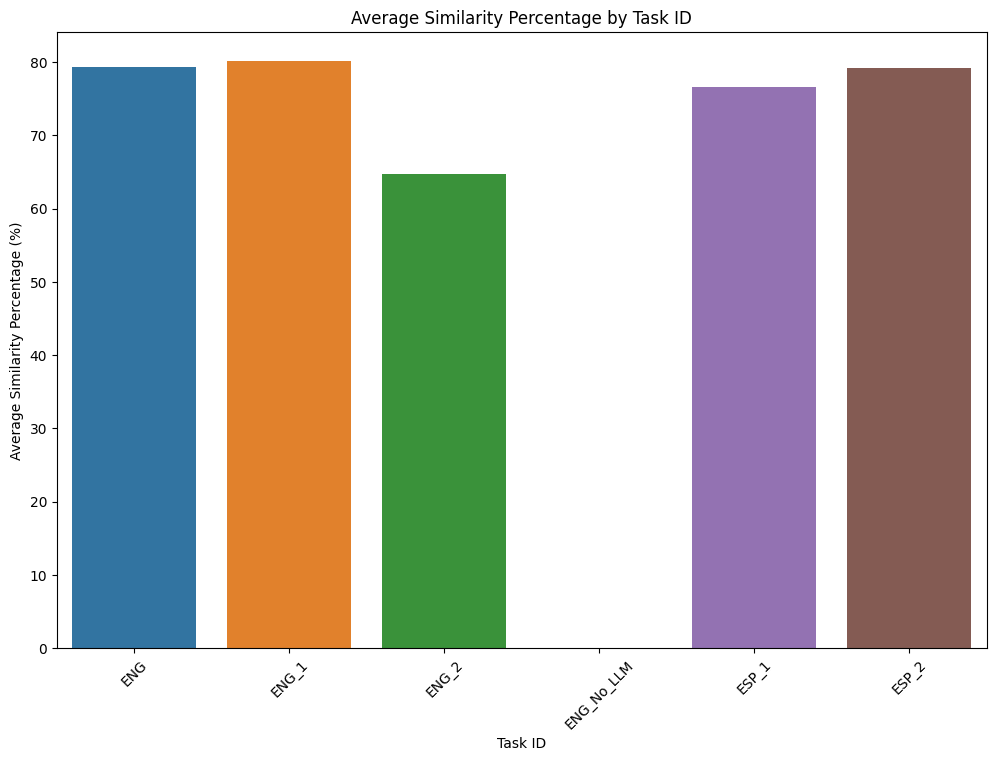

In [232]:
average_similarity_by_task = content_usage.groupby('TASK_ID')['ai_plain_text_similarity_percentage'].mean().reset_index()

# Step 2a: Plot using Seaborn (static plot)
plt.figure(figsize=(12, 8))
sns.barplot(x='TASK_ID', y='ai_plain_text_similarity_percentage', data=average_similarity_by_task, errorbar="sd")
plt.title('Average Similarity Percentage by Task ID')
plt.ylabel('Average Similarity Percentage (%)')
plt.xlabel('Task ID')
plt.xticks(rotation=45)
plt.show()


# Sequence Matcher method - character level comparison

In [217]:


# Function to calculate the similarity between two strings
def calculate_similarity(a, b):
    return SequenceMatcher(None, a, b).ratio()

# Initialize a list to store the similarity results
similarity_results = []

# Loop through each row in content_usage DataFrame
for _, row in content_usage.iterrows():
    plain_text = row['plain_text']
    generated_content = row['generated']
    
    # Extract the response generated by the '@ai generation' feature
    ai_generation_response = None
    for content in generated_content:
        
        if 'feature' in content and content['feature'] == '@ai generation':
            ai_generation_response = content['response']
            break
    
    # Calculate the similarity if @ai generation response is found
    if ai_generation_response:
        similarity = calculate_similarity(ai_generation_response, plain_text)
    else:
        similarity = None  # or 0 if you prefer
    
    # Store the result
    similarity_results.append(similarity)

# Add the similarity results to the DataFrame
content_usage['ai_plain_text_similarity'] = similarity_results

      task_id  total_similarity
0         ENG          1.693491
1       ENG_1          1.458250
2       ENG_2          0.876566
3  ENG_No_LLM          0.000000
4       ESP_1          1.475649
5       ESP_2          1.456858


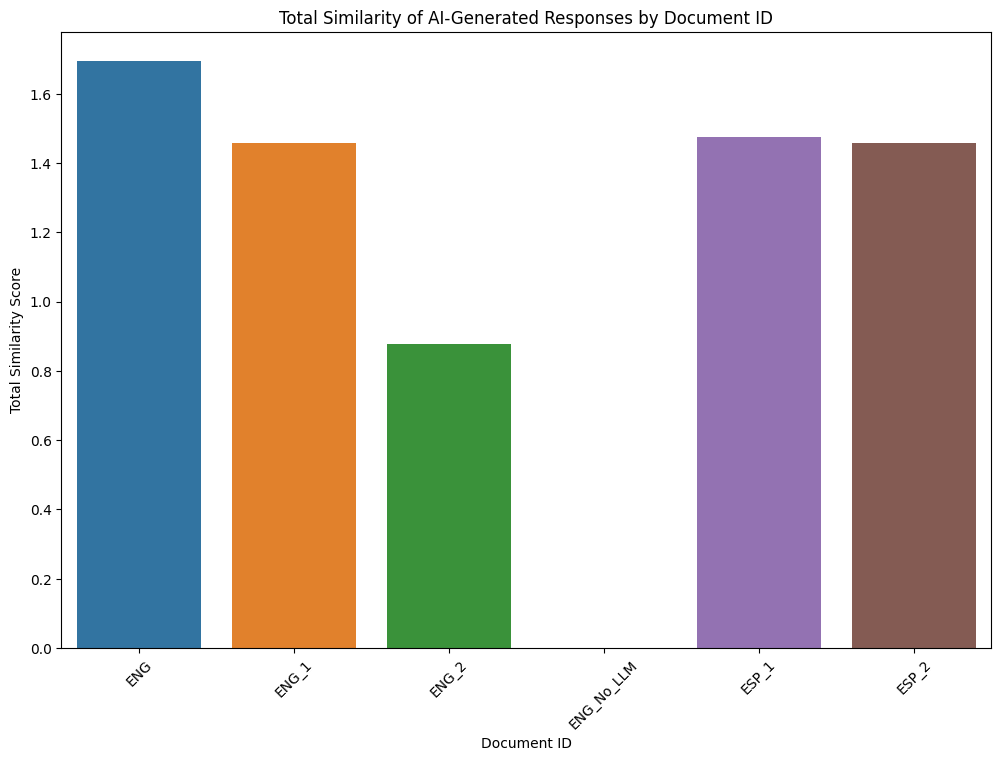

In [219]:
aggregated_similarity = []

# Loop through each row in content_usage DataFrame
for _, row in content_usage.iterrows():
    document_id = row['document_id']
    plain_text = row['plain_text']
    generated_content = row['generated']
    task_id =  row['TASK_ID']
    # Initialize a variable to accumulate similarity scores
    total_similarity = 0
    
    # Loop through each generated content and calculate similarity
    for content in generated_content:
        response = content['response']
        similarity = calculate_similarity(response, plain_text)
        total_similarity += similarity
    
    # Store the aggregated similarity score for the document
    aggregated_similarity.append({
        'task_id': task_id,
        'document_id': document_id,
        'total_similarity': total_similarity
    })

# Convert the list to a DataFrame
aggregated_similarity_df = pd.DataFrame(aggregated_similarity)

# Aggregate the total similarities by document_id
aggregated_similarity_by_document = aggregated_similarity_df.groupby('task_id')['total_similarity'].mean().reset_index()

# Display the aggregated similarities
print(aggregated_similarity_by_document)

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x='task_id', y='total_similarity', data=aggregated_similarity_by_document, errorbar="sd")
plt.title('Total Similarity of AI-Generated Responses by Document ID')
plt.ylabel('Total Similarity Score')
plt.xlabel('Document ID')
plt.xticks(rotation=45)
plt.show()

# weighted method: 

- Calculate the length of the text generated by each feature relative to the total length of all generated content.

In [281]:
def calculate_feature_similarity(plain_text, generated_content, model):
    plain_text_embedding = model.encode([plain_text])
    feature_similarities = {}
    
    for content in generated_content:
        feature = content.get('feature')
        response = content.get('response')
        if response:
            response_embedding = model.encode([response])
            similarity = cosine_similarity(plain_text_embedding, response_embedding)[0][0]
            if feature in feature_similarities:
                feature_similarities[feature].append(similarity)
            else:
                feature_similarities[feature] = [similarity]
    
    # Aggregate similarities for each feature (mean or sum)
    for feature, similarities in feature_similarities.items():
        feature_similarities[feature] = np.mean(similarities) * 100  # Convert to percentage
    
    return feature_similarities


In [282]:
def estimate_feature_contribution(generated_content):
    total_length = sum(len(content.get('response', "")) for content in generated_content)
    feature_contributions = {}
    
    for content in generated_content:
        feature = content.get('feature')
        response_length = len(content.get('response', ""))
        if feature in feature_contributions:
            feature_contributions[feature] += response_length
        else:
            feature_contributions[feature] = response_length
    
    # Convert lengths to percentages
    for feature in feature_contributions:
        feature_contributions[feature] = (feature_contributions[feature] / total_length) * 100
    
    return feature_contributions


In [283]:
def calculate_weighted_similarity(plain_text, generated_content, model):
    feature_similarities = calculate_feature_similarity(plain_text, generated_content, model)
    feature_contributions = estimate_feature_contribution(generated_content)
    
    weighted_similarity = 0
    
    for feature, similarity in feature_similarities.items():
        contribution = feature_contributions.get(feature, 0)
        weighted_similarity += (similarity * contribution / 100)
    
    return weighted_similarity


In [290]:
weighted_similarity_results = []

for _, row in content_usage.iterrows():
    plain_text = row['plain_text']
    generated_content = row['generated']
    
    weighted_similarity = calculate_weighted_similarity(plain_text, generated_content, model)
    weighted_similarity_results.append(weighted_similarity)

# Add to DataFrame
content_usage['weighted_similarity'] = weighted_similarity_results

# Group by TASK_ID and calculate average weighted similarity
grouped_weighted_similarity = content_usage.groupby('TASK_ID')['weighted_similarity'].mean().reset_index()

# Plot the results



In [391]:
content_usage_without_no_llm = content_usage[content_usage['TASK_ID']!='ENG_No_LLM']

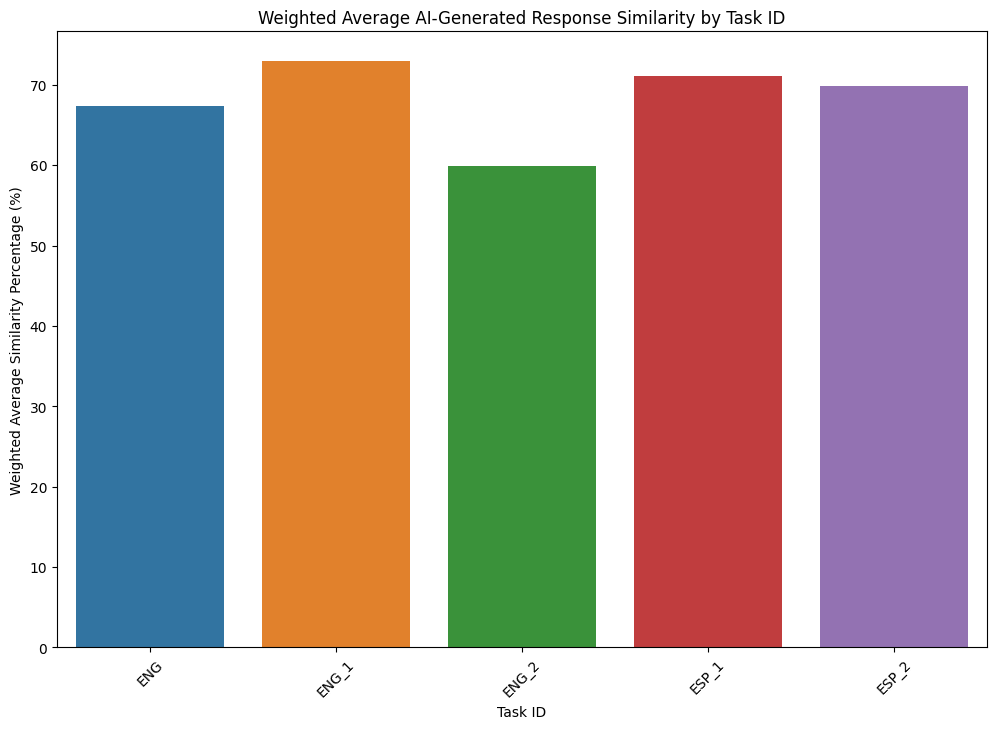

In [392]:
grouped_weighted_similarity = content_usage_without_no_llm.groupby('TASK_ID')['weighted_similarity'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='TASK_ID', y='weighted_similarity', data=grouped_weighted_similarity, errorbar=None)
plt.title('Weighted Average AI-Generated Response Similarity by Task ID')
plt.ylabel('Weighted Average Similarity Percentage (%)')
plt.xlabel('Task ID')
plt.xticks(rotation=45)
plt.show()

## Count the usage from generated content

In [ ]:
def estimate_feature_contribution(generated_content):
    total_length = sum(len(content.get('response', "")) for content in generated_content)
    feature_contributions = {}
    
    for content in generated_content:
        feature = content.get('feature')
        response_length = len(content.get('response', ""))
        if feature in feature_contributions:
            feature_contributions[feature] += response_length
        else:
            feature_contributions[feature] = response_length
    
    # Convert lengths to percentages
    for feature in feature_contributions:
        feature_contributions[feature] = (feature_contributions[feature] / total_length) * 100
    
    return feature_contributions


In [297]:
generated_content

[{'feature': '@ai generation',
  'prompt': 'write an advert for WWF\ufeff',
  'response': "Join hands with us in protecting our planet's precious wildlife! The World Wildlife Fund (WWF) is a global organization dedicated to conserving nature and reducing the most pressing threats to the diversity of life on Earth.As a member, you'll be part of a community that shares your passion for preserving the natural world. Together, we can make a difference in the lives of countless species, from majestic elephants to tiny hummingbirds.Our work focuses on three key areas:1. **Conservation**: Protecting and restoring habitats, addressing climate change, and promoting sustainable development.2. **Education**: Inspiring people to take action through our educational programs, campaigns, and community engagement initiatives.3. **Empowerment**: Supporting local communities in managing their natural resources, ensuring that they benefit from conservation efforts.By joining WWF, you'll become part of a 

In [309]:
usage_count_data = []
for _, row in content_usage.iterrows():
    # plain_text = row['plain_text']
    generated_content = row['generated']
    task_id = row['TASK_ID']
    # for content in generated_content:
    counter = Counter(content.get('feature', 'custom recipe') for content in generated_content)
    for feat, cnt in counter.items():
        usage_count_data.append(
            {
                'task_id': task_id,
                'feature': feat,
                'count': cnt,
            }
        )
        
    # weighted_similarity = calculate_weighted_similarity(plain_text, generated_content, model)
    # weighted_similarity_results.append(weighted_similarity)

In [314]:
usage_count_df = pd.DataFrame(usage_count_data)
usage_count_df

,task_id,feature,count
0,ENG,@ai generation,1
1,ENG,Positive Narrative Framing,3
2,ENG,Emphasis on Long-Term Outcome,1
3,ENG,Cautionary Narrative with Statistics,1
4,ENG,Positive Narrative Framing with Statistics,2
...,...,...,...
287,ENG_2,Positive Narrative Framing with Statistics,1
288,ENG_2,Cautionary Narrative with Statistics,1
289,ENG_2,Emphasis on Immediate Outcome,1
290,ENG_2,Emphasis on Long-Term Outcome,1


In [316]:
usage_count_df.groupby(['task_id','feature'])['count'].sum().reset_index()

,task_id,feature,count
0,ENG,@ai generation,30
1,ENG,Cautionary Narrative Framing,12
2,ENG,Cautionary Narrative with Statistics,11
3,ENG,Emotional Manipulation,1
4,ENG,Emphasis on Immediate Outcome,13
5,ENG,Emphasis on Long-Term Outcome,18
6,ENG,Positive Narrative Framing,31
7,ENG,Positive Narrative Framing with Statistics,15
8,ENG,continuation,10
9,ENG,newly created recipe,3


In [617]:
t = usage_count_df.groupby(['task_id','feature'])['count'].sum().reset_index()
t

,task_id,feature,count
0,ENG,@ai generation,30
1,ENG,Cautionary Narrative Framing,12
2,ENG,Cautionary Narrative with Statistics,11
3,ENG,Emotional Manipulation,1
4,ENG,Emphasis on Immediate Outcome,13
5,ENG,Emphasis on Long-Term Outcome,18
6,ENG,Positive Narrative Framing,31
7,ENG,Positive Narrative Framing with Statistics,15
8,ENG,continuation,10
9,ENG,newly created recipe,3


## weighted average of usefulness by count of usage

In [317]:
usage_names_list = [
    "continuation",
    "@ai generation",
    "Positive Narrative Framing",
    "Cautionary Narrative Framing",
    "Positive Narrative Framing with Statistics",
    "Cautionary Narrative with Statistics",
    "Emphasis on Immediate Outcome",
    "Emphasis on Long-Term Outcome"
]

In [318]:
usage_count_df['feature_filtered'] = usage_count_df['feature'].apply(
    lambda x: x if x in usage_names_list else 'custom'
)

In [342]:
aggregate_data = usage_count_df.groupby(['task_id', 'feature_filtered'])['count'].sum().reset_index()

In [343]:
usage_count_df.groupby(['task_id', 'feature_filtered'])['count'].sum()

task_id  feature_filtered                          
ENG      @ai generation                                30
         Cautionary Narrative Framing                  12
         Cautionary Narrative with Statistics          11
         Emphasis on Immediate Outcome                 13
         Emphasis on Long-Term Outcome                 18
         Positive Narrative Framing                    31
         Positive Narrative Framing with Statistics    15
         continuation                                  10
         custom                                         4
ENG_1    @ai generation                                28
         Cautionary Narrative Framing                   9
         Cautionary Narrative with Statistics           8
         Emphasis on Immediate Outcome                 12
         Emphasis on Long-Term Outcome                 10
         Positive Narrative Framing                    21
         Positive Narrative Framing with Statistics    11
         continuatio

In [613]:
usage_count_df['feature_filtered'].value_counts()

feature_filtered
@ai generation                                53
Positive Narrative Framing                    44
Emphasis on Long-Term Outcome                 37
Positive Narrative Framing with Statistics    34
continuation                                  33
Cautionary Narrative with Statistics          27
Emphasis on Immediate Outcome                 24
Cautionary Narrative Framing                  22
custom                                        18
Name: count, dtype: int64

In [621]:
t = usage_count_df.groupby(['task_id','feature_filtered'])['count'].sum().reset_index()

In [622]:

fig = px.bar(
    t, 
    x='task_id', 
    y='count', 
    color='feature_filtered',
    # hover_data={'filtered_action': True, 'count': True, 'filtered_action': True},
    # labels={'task_id': 'Task ID', 'count': 'Count', 'filtered_action': 'Action'},
    title='Button Clicks Count by Task ID'
)

# Customize the layout
fig.update_layout(
    xaxis_title='Task ID',
    yaxis_title='Count',
    legend_title='Action',
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1,
    width=1600,
    height=800
)

# Rotate x-axis labels
fig.update_xaxes(tickangle=45)

# Show the plot
fig.show()

In [376]:
aggregate_data_without_custom = aggregate_data[aggregate_data['feature_filtered']!='custom']
aggregate_data_without_custom.head(3)

,task_id,feature_filtered,count
0,ENG,@ai generation,30
1,ENG,Cautionary Narrative Framing,12
2,ENG,Cautionary Narrative with Statistics,11


In [377]:
final_df.head(2)

,PROLIFIC_PID,STUDY_ID,TASK_ID,OWN_1,OWN_2,OWN_3,COLAB_1,COLAB_2,COLAB_3,LM_1,...,FEAT_2,FEAT_3,FEAT_4,FEAT_5,FEAT_6,FEAT_7,FEAT_8,average_usefulness,sum_features,sum_features_ai_generate
0,5a4ff22bacc75b000179b0e9,66c516b1d61c7b572205f713,ENG,1,2,1,4,5,2,5,...,0,0,0,0,0,77,4,10.125,81,77
1,5c068f1f9d0df40001e5688c,66c516b1d61c7b572205f713,ENG,5,2,4,4,4,4,4,...,0,75,12,29,16,0,0,21.375,171,0


In [379]:
merged_df = pd.merge(final_df[features_task], aggregate_data_without_custom, left_on='TASK_ID', right_on='task_id')
merged_df

,FEAT_1,FEAT_2,FEAT_3,FEAT_4,FEAT_5,FEAT_6,FEAT_7,FEAT_8,TASK_ID,task_id,feature_filtered,count
0,0,0,0,0,0,0,77,4,ENG,ENG,@ai generation,30
1,0,0,0,0,0,0,77,4,ENG,ENG,Cautionary Narrative Framing,12
2,0,0,0,0,0,0,77,4,ENG,ENG,Cautionary Narrative with Statistics,11
3,0,0,0,0,0,0,77,4,ENG,ENG,Emphasis on Immediate Outcome,13
4,0,0,0,0,0,0,77,4,ENG,ENG,Emphasis on Long-Term Outcome,18
...,...,...,...,...,...,...,...,...,...,...,...,...
635,0,0,0,0,0,0,0,0,ENG_2,ENG_2,Emphasis on Immediate Outcome,2
636,0,0,0,0,0,0,0,0,ENG_2,ENG_2,Emphasis on Long-Term Outcome,6
637,0,0,0,0,0,0,0,0,ENG_2,ENG_2,Positive Narrative Framing,9
638,0,0,0,0,0,0,0,0,ENG_2,ENG_2,Positive Narrative Framing with Statistics,6


In [380]:
mapping = {
    'Positive Narrative Framing': 'FEAT_1',
    'Cautionary Narrative Framing': 'FEAT_2',
    'Positive Narrative Framing with Statistics': 'FEAT_3',
    'Cautionary Narrative with Statistics': 'FEAT_4',
    'Emphasis on Immediate Outcome': 'FEAT_5',
    'Emphasis on Long-Term Outcome': 'FEAT_6',
    '@ai generation': 'FEAT_7',
    'continuation': 'FEAT_8'
}

merged_df['feature_mapped'] = merged_df['feature_filtered'].map(mapping)

In [381]:
merged_df

,FEAT_1,FEAT_2,FEAT_3,FEAT_4,FEAT_5,FEAT_6,FEAT_7,FEAT_8,TASK_ID,task_id,feature_filtered,count,feature_mapped
0,0,0,0,0,0,0,77,4,ENG,ENG,@ai generation,30,FEAT_7
1,0,0,0,0,0,0,77,4,ENG,ENG,Cautionary Narrative Framing,12,FEAT_2
2,0,0,0,0,0,0,77,4,ENG,ENG,Cautionary Narrative with Statistics,11,FEAT_4
3,0,0,0,0,0,0,77,4,ENG,ENG,Emphasis on Immediate Outcome,13,FEAT_5
4,0,0,0,0,0,0,77,4,ENG,ENG,Emphasis on Long-Term Outcome,18,FEAT_6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0,0,0,0,0,0,0,0,ENG_2,ENG_2,Emphasis on Immediate Outcome,2,FEAT_5
636,0,0,0,0,0,0,0,0,ENG_2,ENG_2,Emphasis on Long-Term Outcome,6,FEAT_6
637,0,0,0,0,0,0,0,0,ENG_2,ENG_2,Positive Narrative Framing,9,FEAT_1
638,0,0,0,0,0,0,0,0,ENG_2,ENG_2,Positive Narrative Framing with Statistics,6,FEAT_3


In [382]:
merged_df['weighted_value'] = merged_df.apply(lambda row: row[row['feature_mapped']] * row['count'], axis=1)
merged_df

,FEAT_1,FEAT_2,FEAT_3,FEAT_4,FEAT_5,FEAT_6,FEAT_7,FEAT_8,TASK_ID,task_id,feature_filtered,count,feature_mapped,weighted_value
0,0,0,0,0,0,0,77,4,ENG,ENG,@ai generation,30,FEAT_7,2310
1,0,0,0,0,0,0,77,4,ENG,ENG,Cautionary Narrative Framing,12,FEAT_2,0
2,0,0,0,0,0,0,77,4,ENG,ENG,Cautionary Narrative with Statistics,11,FEAT_4,0
3,0,0,0,0,0,0,77,4,ENG,ENG,Emphasis on Immediate Outcome,13,FEAT_5,0
4,0,0,0,0,0,0,77,4,ENG,ENG,Emphasis on Long-Term Outcome,18,FEAT_6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0,0,0,0,0,0,0,0,ENG_2,ENG_2,Emphasis on Immediate Outcome,2,FEAT_5,0
636,0,0,0,0,0,0,0,0,ENG_2,ENG_2,Emphasis on Long-Term Outcome,6,FEAT_6,0
637,0,0,0,0,0,0,0,0,ENG_2,ENG_2,Positive Narrative Framing,9,FEAT_1,0
638,0,0,0,0,0,0,0,0,ENG_2,ENG_2,Positive Narrative Framing with Statistics,6,FEAT_3,0


In [383]:
merged_df[merged_df['task_id']=='ENG']

,FEAT_1,FEAT_2,FEAT_3,FEAT_4,FEAT_5,FEAT_6,FEAT_7,FEAT_8,TASK_ID,task_id,feature_filtered,count,feature_mapped,weighted_value
0,0,0,0,0,0,0,77,4,ENG,ENG,@ai generation,30,FEAT_7,2310
1,0,0,0,0,0,0,77,4,ENG,ENG,Cautionary Narrative Framing,12,FEAT_2,0
2,0,0,0,0,0,0,77,4,ENG,ENG,Cautionary Narrative with Statistics,11,FEAT_4,0
3,0,0,0,0,0,0,77,4,ENG,ENG,Emphasis on Immediate Outcome,13,FEAT_5,0
4,0,0,0,0,0,0,77,4,ENG,ENG,Emphasis on Long-Term Outcome,18,FEAT_6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0,0,0,0,0,0,97,99,ENG,ENG,Emphasis on Immediate Outcome,13,FEAT_5,0
124,0,0,0,0,0,0,97,99,ENG,ENG,Emphasis on Long-Term Outcome,18,FEAT_6,0
125,0,0,0,0,0,0,97,99,ENG,ENG,Positive Narrative Framing,31,FEAT_1,0
126,0,0,0,0,0,0,97,99,ENG,ENG,Positive Narrative Framing with Statistics,15,FEAT_3,0


In [385]:
weighted_avg_df = merged_df.groupby('TASK_ID').apply(lambda x: x['weighted_value'].sum() / x['count'].sum()).reset_index(name='weighted_avg')
weighted_avg_df

,TASK_ID,weighted_avg
0,ENG,33.715625
1,ENG_1,50.590212
2,ENG_2,46.147500
3,ESP_1,45.201754
4,ESP_2,52.325658


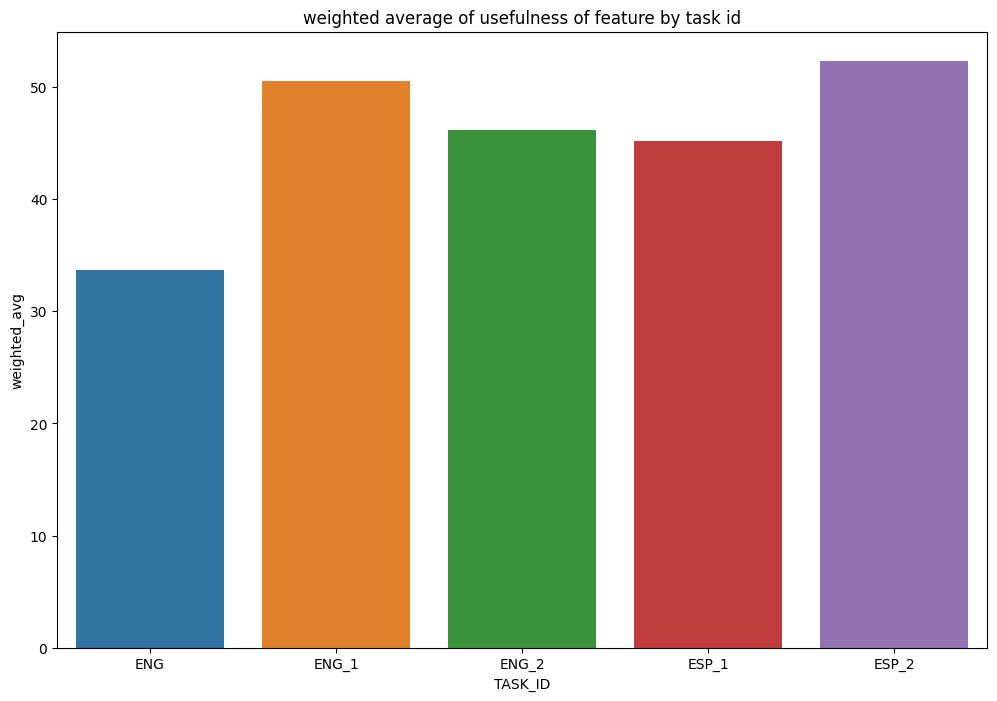

In [389]:
plt.figure(figsize=(12, 8))
sns.barplot(data=weighted_avg_df, x='TASK_ID', y = 'weighted_avg')
plt.title('weighted average of usefulness of feature by task id')
plt.show()

In [375]:
new_mapping = {
    'FEAT_1': 'Positive Narrative Framing',
    'FEAT_2': 'Cautionary Narrative Framing',
    'FEAT_3': 'Positive Narrative Framing with Statistics',
    'FEAT_4': 'Cautionary Narrative with Statistics',
    'FEAT_5': 'Emphasis on Immediate Outcome',
    'FEAT_6': 'Emphasis on Long-Term Outcome',
    'FEAT_7': '@ai generation',
    'FEAT_8': 'continuation'
}

In [374]:
aggregate_data_without_custom['feature_filtered'].unique()

array(['@ai generation', 'Cautionary Narrative Framing',
       'Cautionary Narrative with Statistics',
       'Emphasis on Immediate Outcome', 'Emphasis on Long-Term Outcome',
       'Positive Narrative Framing',
       'Positive Narrative Framing with Statistics', 'continuation'],
      dtype=object)

In [373]:
feature_mapping

{'FEAT_1': 'Variation - Positive Narrative Framing',
 'FEAT_2': 'Variation - Cautionary Narrative Framing',
 'FEAT_3': 'Variation - Positive Narrative Framing with Statistics',
 'FEAT_4': 'Variation - Cautionary Narrative with Statistics',
 'FEAT_5': 'Variation - Emphasis on Immediate Outcome',
 'FEAT_6': 'Variation - Emphasis on Long-Term Outcome',
 'FEAT_7': '@ai to Generate New Texts',
 'FEAT_8': 'Create Continuation'}

In [610]:
aggregate_data

,task_id,from_action,backspace_count
0,ENG,@ai generation,389
1,ENG,Cautionary Narrative Framing,1
2,ENG,Cautionary Narrative with Statistics,1864
3,ENG,Emphasis on Immediate Outcome,9
4,ENG,Emphasis on Long-Term Outcome,24
5,ENG,Positive Narrative Framing,69
6,ENG,Positive Narrative Framing with Statistics,543
7,ENG,START,673
8,ENG,continuation,34
9,ENG,custom_recipe,1


In [611]:
fig = px.bar(
    aggregate_data, 
    x='task_id', 
    y='count', 
    color='feature_filtered',
    # hover_data={'feature_filtered': True, 'count': True, 'feature_filtered': True},
    # labels={'task_id': 'Task ID', 'count': 'Count', 'filtered_action': 'feature_filtered'},
    title='Button Clicks Count by Task ID',
    # histfunc='sum'
)

# Customize the layout
fig.update_layout(
    xaxis_title='Task ID',
    yaxis_title='Count',
    legend_title='Action',
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1,
    width=1600,
    height=800
)

# Rotate x-axis labels
fig.update_xaxes(tickangle=45)

# Show the plot
fig.show()

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['task_id', 'from_action', 'backspace_count'] but received: count

In [340]:
fig.write_html('../figures/usage_of_features.html')


In [ ]:
only_ai_feature = usage_count_df[usage_count_df[feature]=='@ai generation']

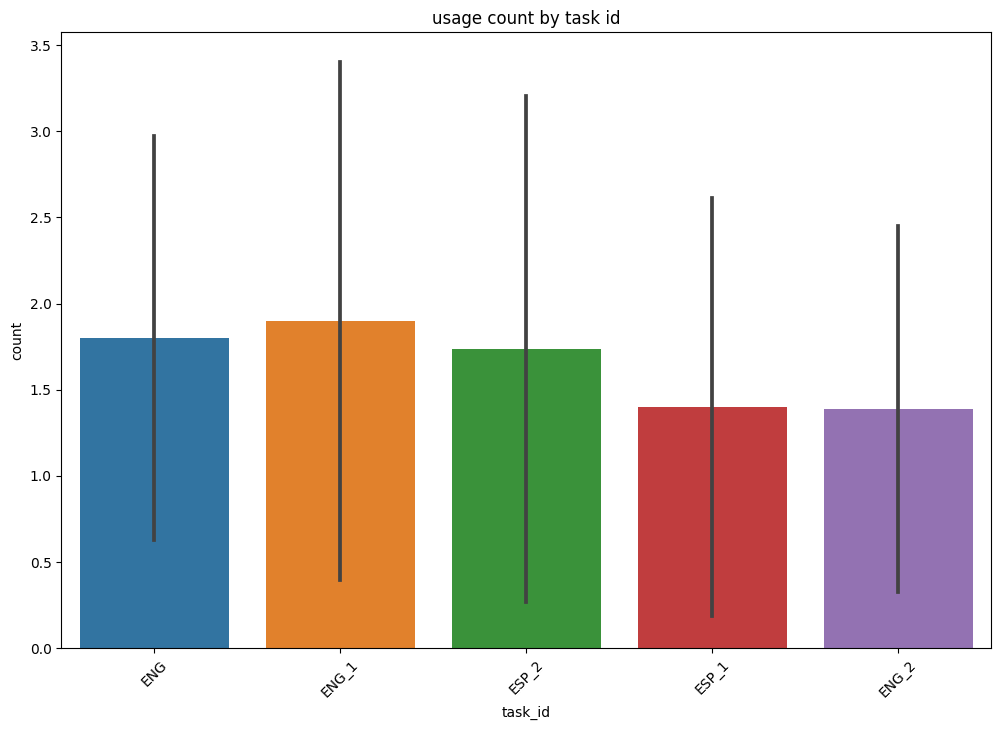

In [312]:
plt.figure(figsize=(12, 8))
sns.barplot(x='task_id', y='count', data=pd.DataFrame(usage_count_data), errorbar='sd')
plt.title('usage count by task id')
plt.xticks(rotation=45)
plt.show()

In [311]:
pd.DataFrame(usage_count_data)

,task_id,feature,count
0,ENG,@ai generation,1
1,ENG,Positive Narrative Framing,3
2,ENG,Emphasis on Long-Term Outcome,1
3,ENG,Cautionary Narrative with Statistics,1
4,ENG,Positive Narrative Framing with Statistics,2
...,...,...,...
287,ENG_2,Positive Narrative Framing with Statistics,1
288,ENG_2,Cautionary Narrative with Statistics,1
289,ENG_2,Emphasis on Immediate Outcome,1
290,ENG_2,Emphasis on Long-Term Outcome,1


# Word level similarity

In [51]:
def calculate_word_match_percentage(content, response):
    if pd.isna(content) or pd.isna(response):
        return np.nan  # Return NaN if either content or response is NaN
    
    # Split content and response into words
    content_words = set(content.split())
    response_words = set(response.split())
    
    # Calculate the number of matching words
    matching_words = content_words.intersection(response_words)
    
    # Calculate the percentage of matching words
    return (len(matching_words) / len(content_words)) * 100 if len(content_words) > 0 else 0

# Apply the function to each row
# gen['match_percentage'] = gen.apply(lambda row: calculate_word_match_percentage(row['content'], row['response']), axis=1)



similarity_results = []

# Loop through each row in content_usage DataFrame
for _, row in content_usage.iterrows():
    plain_text = row['plain_text']
    generated_content = row['generated']
    
    # Extract the response generated by the '@ai generation' feature
    ai_generation_response = None
    for content in generated_content:
        
        if 'feature' in content and content['feature'] == '@ai generation':
            ai_generation_response = content['response']
            break
    
    # Calculate the similarity if @ai generation response is found
    if ai_generation_response:
        similarity = calculate_word_match_percentage(ai_generation_response, plain_text)
    else:
        similarity = None  # or 0 if you prefer
    
    # Store the result
    similarity_results.append(similarity)

# Add the similarity results to the DataFrame
content_usage['ai_plain_text_similarity'] = similarity_results

In [55]:
grouped_similarity = content_usage[['TASK_ID','ai_plain_text_similarity']].groupby('TASK_ID')['ai_plain_text_similarity'].mean().reset_index()


In [58]:
grouped_similarity

,TASK_ID,ai_plain_text_similarity
0,EN,54.791365
1,ENG1,70.520350
2,ENG2,74.791772
3,ESP1,61.526364
4,ESP2,57.907462


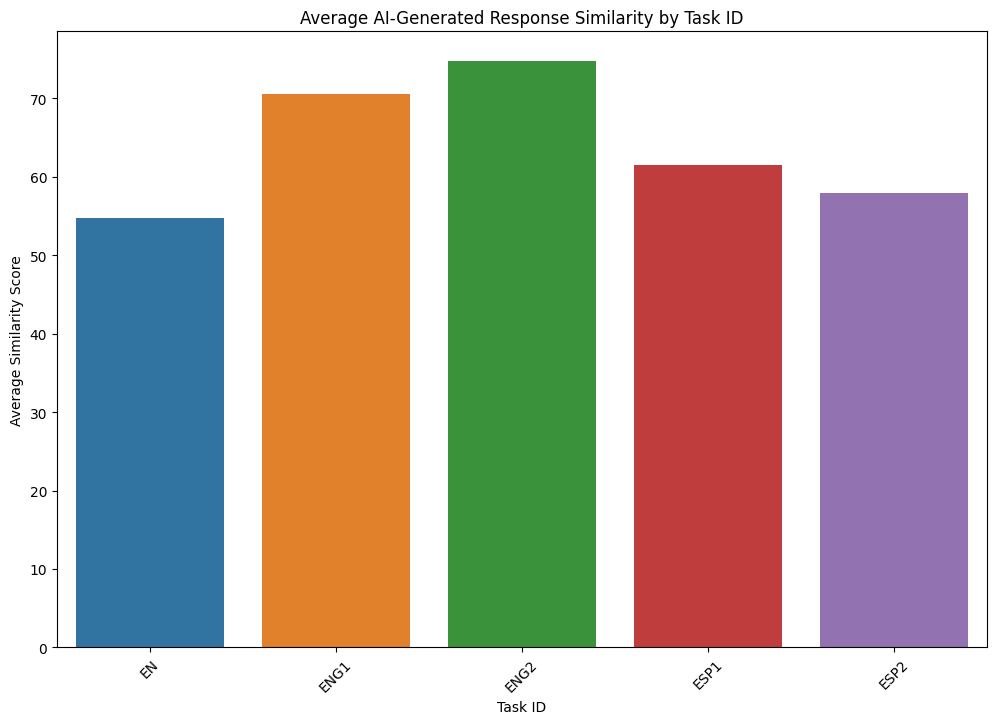

In [64]:
plt.figure(figsize=(12, 8))
sns.barplot(x='TASK_ID', y='ai_plain_text_similarity', data=grouped_similarity, errorbar=None)
plt.title('Average AI-Generated Response Similarity by Task ID')
plt.ylabel('Average Similarity Score')
plt.xlabel('Task ID')
plt.xticks(rotation=45)
plt.show()

# Document Meta

In [155]:
master_documents_df

,_id,content,name,chunks,timestamp,task_id,prolific_id,study_id,plain_text,word_count
0,66c5a13c86c57a87db6f59d9,"<p class=""llmparagraph id0""><span id=""chunk_TD...",NaN,"[{'frontend_id': 'chunk_JfRRo', 'versions': [{...",2024-08-21 08:11:40.473000+00:00,main_task_1,5a4ff22bacc75b000179b0e9,66c516b1d61c7b572205f713,Join hands with us in protecting our planet's ...,193
1,66c5e4be2f44d7b54f76e52d,"<p><span class=""chunk factor_9b1tC"" style=""bac...",NaN,"[{'frontend_id': 'chunk_TG1Gd', 'versions': [{...",2024-08-21 12:59:42.981000+00:00,main_task_1,5c068f1f9d0df40001e5688c,66c516b1d61c7b572205f713,In a time of uncertainty for the future of our...,167
2,66c5a21086c57a87db6f59e1,"<p class=""llmparagraph id0""><span id=""chunk_AK...",NaN,"[{'frontend_id': 'chunk_AKbWr', 'versions': [{...",2024-08-21 08:15:12.263000+00:00,main_task_1,5c62de3f48fe4e000180e09d,66c516b1d61c7b572205f713,We are at a critical juncture where our inacti...,291
3,66c5a3e386c57a87db6f59f9,"<p class=""llmparagraph id1"">&nbsp;</p>\n<p cla...",NaN,"[{'frontend_id': 'chunk_JAHGD', 'versions': [{...",2024-08-21 08:22:59.626000+00:00,main_task_1,5ea9a41b87b4150bf9634637,66c516b1d61c7b572205f713,\nThe World Wildlife Fund (WWF) is a beacon o...,156
4,66c5a85186c57a87db6f5a21,<p>Join the fight for our planet's future with...,NaN,NaN,2024-08-21 08:41:53.158000+00:00,main_task_1,5f22932ca6ff8f000918fdfb,66c516b1d61c7b572205f713,Join the fight for our planet's future with th...,247
...,...,...,...,...,...,...,...,...,...,...
67,66c742626db9c208f260cbeb,<p>The mission of World Wildlife Fund (WWF) is...,NaN,[],2024-08-22 13:51:30.500000+00:00,main_task_1,63ed9dbc1c7838ffcbb42142,66c63f502b78911af098063d,The mission of World Wildlife Fund (WWF) is to...,110
68,66c74f216db9c208f260cc0c,"<p class=""llmparagraph id0""><span id=""chunk_Oo...",NaN,"[{'frontend_id': 'chunk_Oo0cO', 'versions': [{...",2024-08-22 14:45:53.413000+00:00,main_task_2,60c101e4634ffb1aa797b924,66c63f502b78911af098063d,"Estimados amigos y ciudadanos, En estos moment...",112
69,66c750f16db9c208f260cc18,"<p><span id=""chunk_HQxbc"" class=""chunk factor_...",NaN,"[{'frontend_id': 'chunk_HQxbc', 'versions': [{...",2024-08-22 14:53:37.416000+00:00,main_task_1,60c101e4634ffb1aa797b924,66c63f502b78911af098063d,"By supporting our donation drive, you will not...",359
70,66c757f06db9c208f260cc32,<p>&iexcl;&Uacute;nete a Nosotros para Protege...,NaN,[],2024-08-22 15:23:28.021000+00:00,main_task_2,6549030c68f0146d7216bb1c,66c63f502b78911af098063d,¡Únete a Nosotros para Proteger Nuestro Planet...,177


In [59]:
grouped_word_count = master_documents_df[['TASK_ID','word_count']].groupby('TASK_ID')['word_count'].mean().reset_index()
grouped_word_count

,TASK_ID,word_count
0,EN,194.8750
1,ENG1,250.1250
2,ENG2,177.0000
3,ESP1,158.8125
4,ESP2,193.4375


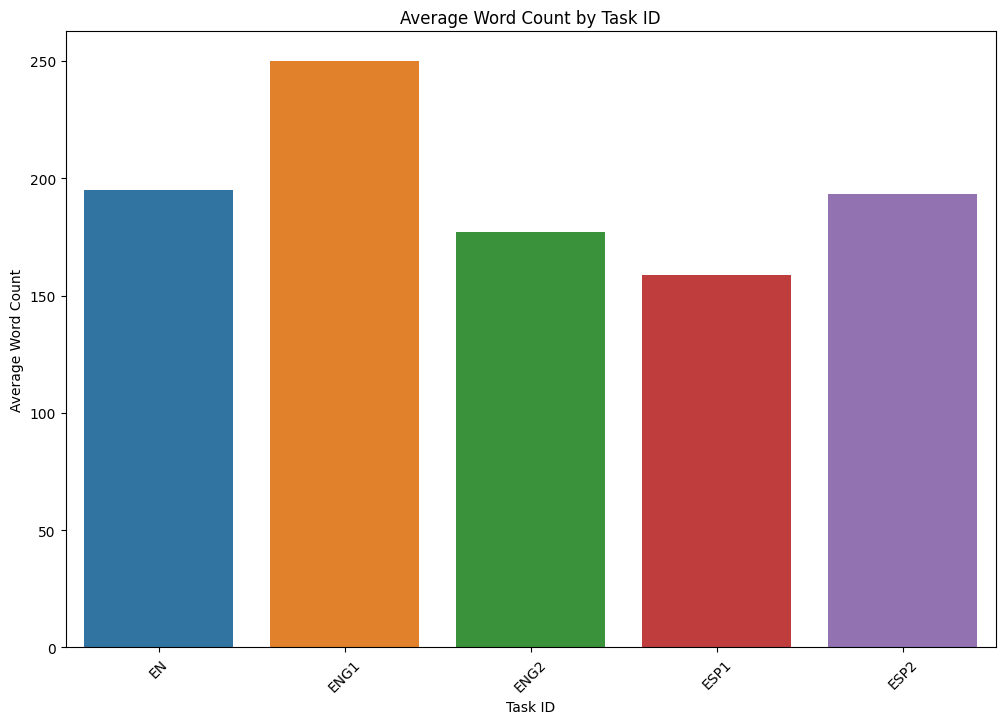

In [63]:
plt.figure(figsize=(12, 8))
sns.barplot(x='TASK_ID', y='word_count', data=grouped_word_count, errorbar=None)
plt.title('Average Word Count by Task ID')
plt.ylabel('Average Word Count')
plt.xlabel('Task ID')
plt.xticks(rotation=45)
plt.show()

# typing activity

In [397]:
master_activity_df

,_id,document_id,task_id,prolific_id,activity_log,time_spent_outside,timestamp,study_id,TASK_ID
0,66c5a24c86c57a87db6f59e3,66c5a13c86c57a87db6f59d9,main_task_1,5a4ff22bacc75b000179b0e9,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-21 08:16:12.414000+00:00,66c516b1d61c7b572205f713,ENG
1,66c5e8072f44d7b54f76e537,66c5e4be2f44d7b54f76e52d,main_task_1,5c068f1f9d0df40001e5688c,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-21 13:13:43.830000+00:00,66c516b1d61c7b572205f713,ENG
2,66c5a2ec86c57a87db6f59ed,66c5a21086c57a87db6f59e1,main_task_1,5c62de3f48fe4e000180e09d,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-21 08:18:52.061000+00:00,66c516b1d61c7b572205f713,ENG
3,66c88800e46942c099b32394,66c88773e46942c099b32393,main_task_1,5d1f9776676cd1001580ae9c,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-23 13:00:48.591000+00:00,66c516b1d61c7b572205f713,ENG
4,66c5a5c486c57a87db6f5a00,66c5a3e386c57a87db6f59f9,main_task_1,5ea9a41b87b4150bf9634637,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-21 08:31:00.305000+00:00,66c516b1d61c7b572205f713,ENG
...,...,...,...,...,...,...,...,...,...
91,66c9e020925382be577189bb,66c9dc59925382be577189b5,main_task_1,60897f81d4a682307c628739,"{'buttonClicks': [], 'generatedContent': [], '...",12800,2024-08-24 13:29:04.194000+00:00,66c90fcc4541f87369be0127,ENG_No_LLM
92,66c9e04f925382be577189be,66c9dbe4925382be577189af,main_task_1,66a3b18c58afbaf406f6ed4a,"{'buttonClicks': [], 'generatedContent': [], '...",12560,2024-08-24 13:29:51.324000+00:00,66c90fcc4541f87369be0127,ENG_No_LLM
93,66c9e11b925382be577189c1,66c9da27925382be5771899c,main_task_1,6676842beee8713bc1b33408,"{'buttonClicks': [], 'generatedContent': [], '...",12750,2024-08-24 13:33:15.492000+00:00,66c90fcc4541f87369be0127,ENG_No_LLM
94,66c9f25b925382be577189c9,66c9f03a925382be577189c6,main_task_1,5efc4a5bed804f20d1c1b0f4,"{'buttonClicks': [], 'generatedContent': [], '...",0,2024-08-24 14:46:51.777000+00:00,66c90fcc4541f87369be0127,ENG_No_LLM


In [402]:
master_activity_df.iloc[0]['activity_log'].keys()

dict_keys(['buttonClicks', 'generatedContent', 'keyLogs', 'visibilityState'])

In [399]:
key_logs = master_activity_df.copy(deep=True)
key_logs['key_logs'] = master_activity_df['activity_log'].apply(lambda x:x['keyLogs'])
key_logs.head(2)

,_id,document_id,task_id,prolific_id,activity_log,time_spent_outside,timestamp,study_id,TASK_ID,key_logs
0,66c5a24c86c57a87db6f59e3,66c5a13c86c57a87db6f59d9,main_task_1,5a4ff22bacc75b000179b0e9,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-21 08:16:12.414000+00:00,66c516b1d61c7b572205f713,ENG,"[{'key': 'Shift', 'timestamp': '2024-08-21T08:..."
1,66c5e8072f44d7b54f76e537,66c5e4be2f44d7b54f76e52d,main_task_1,5c068f1f9d0df40001e5688c,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-21 13:13:43.830000+00:00,66c516b1d61c7b572205f713,ENG,"[{'key': 'Backspace', 'timestamp': '2024-08-21..."


In [403]:
key_logs['generated_content'] = master_activity_df['activity_log'].apply(lambda x:x['generatedContent'])

In [408]:
key_logs.iloc[0]['key_logs']

[{'key': 'Shift', 'timestamp': '2024-08-21T08:11:47.620Z'},
 {'key': 'Shift', 'timestamp': '2024-08-21T08:11:48.252Z'},
 {'key': '@', 'timestamp': '2024-08-21T08:11:48.700Z'},
 {'key': 'a', 'timestamp': '2024-08-21T08:11:49.164Z'},
 {'key': 'i', 'timestamp': '2024-08-21T08:11:49.420Z'},
 {'key': ' ', 'timestamp': '2024-08-21T08:11:49.644Z'},
 {'key': 'w', 'timestamp': '2024-08-21T08:11:49.812Z'},
 {'key': 'r', 'timestamp': '2024-08-21T08:11:49.988Z'},
 {'key': 'i', 'timestamp': '2024-08-21T08:11:50.100Z'},
 {'key': 't', 'timestamp': '2024-08-21T08:11:50.356Z'},
 {'key': 'e', 'timestamp': '2024-08-21T08:11:50.460Z'},
 {'key': ' ', 'timestamp': '2024-08-21T08:11:50.564Z'},
 {'key': 'a', 'timestamp': '2024-08-21T08:11:50.812Z'},
 {'key': 'n', 'timestamp': '2024-08-21T08:11:50.956Z'},
 {'key': ' ', 'timestamp': '2024-08-21T08:11:51.132Z'},
 {'key': 'a', 'timestamp': '2024-08-21T08:11:51.668Z'},
 {'key': 'd', 'timestamp': '2024-08-21T08:11:51.884Z'},
 {'key': 'v', 'timestamp': '2024-08-21T0

In [404]:
key_logs.iloc[0]['generated_content']

[{'feature': '@ai generation',
  'prompt': 'write an advert for WWF\ufeff',
  'response': "Join hands with us in protecting our planet's precious wildlife! The World Wildlife Fund (WWF) is a global organization dedicated to conserving nature and reducing the most pressing threats to the diversity of life on Earth.As a member, you'll be part of a community that shares your passion for preserving the natural world. Together, we can make a difference in the lives of countless species, from majestic elephants to tiny hummingbirds.Our work focuses on three key areas:1. **Conservation**: Protecting and restoring habitats, addressing climate change, and promoting sustainable development.2. **Education**: Inspiring people to take action through our educational programs, campaigns, and community engagement initiatives.3. **Empowerment**: Supporting local communities in managing their natural resources, ensuring that they benefit from conservation efforts.By joining WWF, you'll become part of a 

In [461]:
from datetime import datetime, timedelta
from collections import defaultdict


In [438]:
rows = []

# Iterate over each document and its sorted events
for _, row in key_logs.iterrows():
    doc_id = row['document_id']
    task_id = row['TASK_ID']
    key_strokes = row['key_logs']
    feature_usg = row['generated_content']
    
    # Collect all key press events for the document
    for stroke in key_strokes:
        rows.append({
            'doc_id': doc_id,
            'task_id': task_id,
            'event_type': 'key',
            'content': stroke['key'],
            'timestamp': datetime.fromisoformat(stroke['timestamp'].replace('Z', '+00:00'))
        })
    
    # Collect all feature usage events for the document
    for content in feature_usg:
        rows.append({
            'doc_id': doc_id,
            'task_id': task_id,
            'event_type': content['feature'] if 'feature' in content else 'custom',
            'content': content['response'],
            'timestamp': datetime.fromisoformat(content['timestamp'].replace('Z', '+00:00'))
        })

# Convert the list of rows into a DataFrame
df = pd.DataFrame(rows)

# Sort the DataFrame by document ID and timestamp to ensure the order is correct
df.sort_values(by=['doc_id', 'timestamp'], inplace=True)
df.reset_index(drop=True, inplace=True)


In [439]:
df.head(1)

,doc_id,task_id,event_type,content,timestamp
0,66c522869236da2225cc8cf2,ENG,key,Shift,2024-08-20 23:11:10.701000+00:00


In [440]:
df['event_type'].unique()

array(['key', '@ai generation', 'Emphasis on Long-Term Outcome',
       'Emphasis on Immediate Outcome',
       'Cautionary Narrative with Statistics',
       'Positive Narrative Framing with Statistics',
       'Cautionary Narrative Framing', 'Positive Narrative Framing',
       'continuation', 'newly created recipe', 'custom',
       'Be More Emotional', 'Summary: ADD STATISTICS',
       'Emotional Manipulation'], dtype=object)

In [441]:
outside_standard_recipe = ['Be More Emotional', 'newly created recipe', 'Be More Emotional', 'Summary: ADD STATISTICS', 'Emotional Manipulation']

In [444]:
df['event_type'] = df['event_type'].apply(lambda x: x if x not in outside_standard_recipe else 'custom')

In [445]:
df['event_type'].unique()

array(['key', '@ai generation', 'Emphasis on Long-Term Outcome',
       'Emphasis on Immediate Outcome',
       'Cautionary Narrative with Statistics',
       'Positive Narrative Framing with Statistics',
       'Cautionary Narrative Framing', 'Positive Narrative Framing',
       'continuation', 'custom'], dtype=object)

In [462]:
df_with_start_end = df.copy()

# Initialize a list to store the new rows (for START and END events)
additional_rows = []

for doc_id, group in df.groupby('doc_id'):
    # Get the earliest and latest timestamp for the current document
    earliest_time = group['timestamp'].min()
    latest_time = group['timestamp'].max()

    # Add the START event before the earliest event
    additional_rows.append({
        'doc_id': doc_id,
        'task_id': group['task_id'].iloc[0],  # Assuming the task_id is the same for all rows in the group
        'event_type': 'START',
        'content': None,  # START event has no content
        'timestamp': earliest_time - timedelta(milliseconds=1)  # Just before the earliest event
    })

    # Add the END event after the last event
    additional_rows.append({
        'doc_id': doc_id,
        'task_id': group['task_id'].iloc[0],
        'event_type': 'END',
        'content': None,  # END event has no content
        'timestamp': latest_time + timedelta(milliseconds=1)  # Just after the latest event
    })

# Convert the additional rows to a DataFrame
additional_df = pd.DataFrame(additional_rows)

# Append START and END rows to the original DataFrame and sort by timestamp
df_with_start_end = pd.concat([df_with_start_end, additional_df])
df_with_start_end.sort_values(by=['doc_id', 'timestamp'], inplace=True)
df_with_start_end.reset_index(drop=True, inplace=True)

In [464]:
df_with_start_end[df_with_start_end['doc_id']=='66c522869236da2225cc8cf2']

,doc_id,task_id,event_type,content,timestamp
0,66c522869236da2225cc8cf2,ENG,START,None,2024-08-20 23:11:10.700000+00:00
1,66c522869236da2225cc8cf2,ENG,key,Shift,2024-08-20 23:11:10.701000+00:00
2,66c522869236da2225cc8cf2,ENG,key,@,2024-08-20 23:11:10.893000+00:00
3,66c522869236da2225cc8cf2,ENG,key,a,2024-08-20 23:11:11.345000+00:00
4,66c522869236da2225cc8cf2,ENG,key,i,2024-08-20 23:11:11.502000+00:00
...,...,...,...,...,...
249,66c522869236da2225cc8cf2,ENG,Positive Narrative Framing,The World Wildlife Fund (WWF) is an internatio...,2024-08-20 23:14:47.443000+00:00
250,66c522869236da2225cc8cf2,ENG,Positive Narrative Framing,The World Wildlife Fund (WWF) is an internatio...,2024-08-20 23:14:55.493000+00:00
251,66c522869236da2225cc8cf2,ENG,Emphasis on Immediate Outcome,The World Wildlife Fund (WWF) is an internatio...,2024-08-20 23:15:02.930000+00:00
252,66c522869236da2225cc8cf2,ENG,Emphasis on Long-Term Outcome,The World Wildlife Fund (WWF) is an internatio...,2024-08-20 23:15:08.815000+00:00


In [465]:
transitions_dict = defaultdict(list)
initial_event_type = "START"

for doc_id, group in df_with_start_end.groupby('doc_id'):
    previous_event_type = initial_event_type
    current_event_type = None
    key_counter = Counter()
    for _, row in group.iterrows():
        current_event_type = row['event_type']
        if current_event_type != 'key' and previous_event_type is not None:
        # If we're transitioning from one non-key event type to another, record the data
            transitions_dict[doc_id].append({
                'from_event_type': previous_event_type,
                'to_event_type': current_event_type,
                'key_counts': dict(key_counter)  # Convert Counter to a dict
            })
            key_counter = Counter()
            previous_event_type = current_event_type
        if current_event_type == 'key':
            key_counter[row['content']] += 1
    
    if key_counter:
        transitions_dict[doc_id].append({
            'from_event_type': previous_event_type,
            'to_event_type': "END",  # You could use "END" or any final state you like
            'key_counts': dict(key_counter)
        }) 

In [466]:
result_rows = []
for doc_id, transitions in transitions_dict.items():
    for transition in transitions:
        if transition['key_counts']:  # Only include if key_counts is not empty
            result_rows.append({
                'doc_id': doc_id,
                'from_event_type': transition['from_event_type'],
                'to_event_type': transition['to_event_type'],
                'key_counts': transition['key_counts']
            })

In [467]:
transitions_df = pd.DataFrame(result_rows)


In [ ]:
tmp = key_logs[key_logs['document_id']=='66c522869236da2225cc8cf2'].iloc[0]['key_logs'] + key_logs[key_logs['document_id']=='66c522869236da2225cc8cf2'].iloc[0]['generated_content']
tmp.sort(key=lambda x: x['timestamp'])
tmp

In [479]:
key_logs_combined = key_logs.copy(deep=True)

In [481]:
key_logs_combined

,_id,document_id,task_id,prolific_id,activity_log,time_spent_outside,timestamp,study_id,TASK_ID,key_logs,generated_content
0,66c5a24c86c57a87db6f59e3,66c5a13c86c57a87db6f59d9,main_task_1,5a4ff22bacc75b000179b0e9,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-21 08:16:12.414000+00:00,66c516b1d61c7b572205f713,ENG,"[{'key': 'Shift', 'timestamp': '2024-08-21T08:...","[{'feature': '@ai generation', 'prompt': 'writ..."
1,66c5e8072f44d7b54f76e537,66c5e4be2f44d7b54f76e52d,main_task_1,5c068f1f9d0df40001e5688c,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-21 13:13:43.830000+00:00,66c516b1d61c7b572205f713,ENG,"[{'key': 'Backspace', 'timestamp': '2024-08-21...",[{'feature': 'Cautionary Narrative with Statis...
2,66c5a2ec86c57a87db6f59ed,66c5a21086c57a87db6f59e1,main_task_1,5c62de3f48fe4e000180e09d,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-21 08:18:52.061000+00:00,66c516b1d61c7b572205f713,ENG,"[{'key': 'Shift', 'timestamp': '2024-08-21T08:...","[{'feature': '@ai generation', 'prompt': 'plea..."
3,66c88800e46942c099b32394,66c88773e46942c099b32393,main_task_1,5d1f9776676cd1001580ae9c,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-23 13:00:48.591000+00:00,66c516b1d61c7b572205f713,ENG,"[{'key': 'Control', 'timestamp': '2024-08-23T1...","[{'feature': '@ai generation', 'prompt': 'use ..."
4,66c5a5c486c57a87db6f5a00,66c5a3e386c57a87db6f59f9,main_task_1,5ea9a41b87b4150bf9634637,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-21 08:31:00.305000+00:00,66c516b1d61c7b572205f713,ENG,"[{'key': 'Enter', 'timestamp': '2024-08-21T08:...","[{'feature': '@ai generation', 'prompt': ' ﻿Wr..."
...,...,...,...,...,...,...,...,...,...,...,...
91,66c9e020925382be577189bb,66c9dc59925382be577189b5,main_task_1,60897f81d4a682307c628739,"{'buttonClicks': [], 'generatedContent': [], '...",12800,2024-08-24 13:29:04.194000+00:00,66c90fcc4541f87369be0127,ENG_No_LLM,"[{'key': 'Backspace', 'timestamp': '2024-08-24...",[]
92,66c9e04f925382be577189be,66c9dbe4925382be577189af,main_task_1,66a3b18c58afbaf406f6ed4a,"{'buttonClicks': [], 'generatedContent': [], '...",12560,2024-08-24 13:29:51.324000+00:00,66c90fcc4541f87369be0127,ENG_No_LLM,"[{'key': 'Backspace', 'timestamp': '2024-08-24...",[]
93,66c9e11b925382be577189c1,66c9da27925382be5771899c,main_task_1,6676842beee8713bc1b33408,"{'buttonClicks': [], 'generatedContent': [], '...",12750,2024-08-24 13:33:15.492000+00:00,66c90fcc4541f87369be0127,ENG_No_LLM,"[{'key': 'Backspace', 'timestamp': '2024-08-24...",[]
94,66c9f25b925382be577189c9,66c9f03a925382be577189c6,main_task_1,5efc4a5bed804f20d1c1b0f4,"{'buttonClicks': [], 'generatedContent': [], '...",0,2024-08-24 14:46:51.777000+00:00,66c90fcc4541f87369be0127,ENG_No_LLM,"[{'key': 'CapsLock', 'timestamp': '2024-08-24T...",[]


In [ ]:
key_logs_combined['combined_logs'] = key_logs_combined.apply(lambda x: x['key_logs'] + x['generated_content'], axis=1)
key_logs_combined

In [484]:
key_logs_combined = key_logs_combined[key_logs_combined['TASK_ID']!='ENG_No_LLM']

In [485]:
key_logs_combined.head(1)

,_id,document_id,task_id,prolific_id,activity_log,time_spent_outside,timestamp,study_id,TASK_ID,key_logs,generated_content,combined_logs
0,66c5a24c86c57a87db6f59e3,66c5a13c86c57a87db6f59d9,main_task_1,5a4ff22bacc75b000179b0e9,{'buttonClicks': [{'action': 'CREATE VARIATION...,0,2024-08-21 08:16:12.414000+00:00,66c516b1d61c7b572205f713,ENG,"[{'key': 'Shift', 'timestamp': '2024-08-21T08:...","[{'feature': '@ai generation', 'prompt': 'writ...","[{'key': 'Shift', 'timestamp': '2024-08-21T08:..."


In [505]:
key_logs_combined['generated_content'].iloc[0]

[{'feature': '@ai generation',
  'prompt': 'write an advert for WWF\ufeff',
  'response': "Join hands with us in protecting our planet's precious wildlife! The World Wildlife Fund (WWF) is a global organization dedicated to conserving nature and reducing the most pressing threats to the diversity of life on Earth.As a member, you'll be part of a community that shares your passion for preserving the natural world. Together, we can make a difference in the lives of countless species, from majestic elephants to tiny hummingbirds.Our work focuses on three key areas:1. **Conservation**: Protecting and restoring habitats, addressing climate change, and promoting sustainable development.2. **Education**: Inspiring people to take action through our educational programs, campaigns, and community engagement initiatives.3. **Empowerment**: Supporting local communities in managing their natural resources, ensuring that they benefit from conservation efforts.By joining WWF, you'll become part of a 

In [551]:
def ensure_feature_key(content_list):
    for content in content_list:
        if 'feature' not in content:
            content['feature'] = 'custom_recipe'
        if 'feature' in content and content['feature'] in outside_standard_recipe:
            content['feature'] = 'custom_recipe'
    return content_list

# Apply the function to the 'generated_content' column
key_logs_combined['generated_content'] = key_logs_combined['generated_content'].apply(ensure_feature_key)


C:\Users\shrey\AppData\Local\Temp\ipykernel_14220\1431886949.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [552]:
key_logs_combined['combined_logs_sorted'] = key_logs_combined['combined_logs'].apply(
    lambda logs: sorted(logs, key=lambda x: x['timestamp'])
)

C:\Users\shrey\AppData\Local\Temp\ipykernel_14220\684545518.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [553]:
key_logs_combined.iloc[0]['combined_logs_sorted']

[{'key': 'Shift', 'timestamp': '2024-08-21T08:11:47.620Z'},
 {'key': 'Shift', 'timestamp': '2024-08-21T08:11:48.252Z'},
 {'key': '@', 'timestamp': '2024-08-21T08:11:48.700Z'},
 {'key': 'a', 'timestamp': '2024-08-21T08:11:49.164Z'},
 {'key': 'i', 'timestamp': '2024-08-21T08:11:49.420Z'},
 {'key': ' ', 'timestamp': '2024-08-21T08:11:49.644Z'},
 {'key': 'w', 'timestamp': '2024-08-21T08:11:49.812Z'},
 {'key': 'r', 'timestamp': '2024-08-21T08:11:49.988Z'},
 {'key': 'i', 'timestamp': '2024-08-21T08:11:50.100Z'},
 {'key': 't', 'timestamp': '2024-08-21T08:11:50.356Z'},
 {'key': 'e', 'timestamp': '2024-08-21T08:11:50.460Z'},
 {'key': ' ', 'timestamp': '2024-08-21T08:11:50.564Z'},
 {'key': 'a', 'timestamp': '2024-08-21T08:11:50.812Z'},
 {'key': 'n', 'timestamp': '2024-08-21T08:11:50.956Z'},
 {'key': ' ', 'timestamp': '2024-08-21T08:11:51.132Z'},
 {'key': 'a', 'timestamp': '2024-08-21T08:11:51.668Z'},
 {'key': 'd', 'timestamp': '2024-08-21T08:11:51.884Z'},
 {'key': 'v', 'timestamp': '2024-08-21T0

In [554]:
def process_logs(logs):
    key_counter = Counter()
    results = []
    prev_action = "START"

    for log in logs:
        if 'key' in log:
            # Count the key presses
            key_counter[log['key']] += 1
        else:
            if 'feature' in log:
            # When a feature is encountered, save the results from START to this feature
                results.append({
                    'from_action': prev_action,
                    'to_action': log['feature'],
                    'key_counts': dict(key_counter)
                })
                # Reset the counter and update the previous action
                key_counter = Counter()
                prev_action = log['feature']
            else:
                results.append({
                    'from_action': prev_action,
                    'to_action': 'custom_recipe',
                    'key_counts': dict(key_counter)
                })
                # Reset the counter and update the previous action
                key_counter = Counter()
                prev_action = 'custom_recipe'
                
        
    
    # Capture the final set of key presses up to the last feature
    results.append({
        'from_action': prev_action,
        'to_action': "END",
        'key_counts': dict(key_counter)
    })
    
    return results

In [555]:


# Apply the process_logs function to the combined_logs_sorted column
key_logs_combined['processed_logs'] = key_logs_combined['combined_logs_sorted'].apply(process_logs)

# Flatten the processed logs into a DataFrame for easier analysis
flattened_results = []

for _, row in key_logs_combined.iterrows():
    doc_id = row['document_id']
    task_id = row['TASK_ID']
    for entry in row['processed_logs']:
        flattened_results.append({
            'doc_id': doc_id,
            'task_id': task_id,
            'from_action': entry['from_action'],
            'to_action': entry['to_action'],
            'key_counts': entry['key_counts']
        })

# Convert the flattened results into a DataFrame
final_df = pd.DataFrame(flattened_results)

C:\Users\shrey\AppData\Local\Temp\ipykernel_14220\4057163786.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [556]:
final_df[final_df['from_action']=='custom_recipe']

,doc_id,task_id,from_action,to_action,key_counts
114,66c88f79e46942c099b323a7,ENG,custom_recipe,continuation,"{'CapsLock': 2, 'Y': 1, 'o': 2, 'u': 2, 'r': 2..."
117,66c88f79e46942c099b323a7,ENG,custom_recipe,END,{}
138,66c88d0be46942c099b323a0,ENG,custom_recipe,continuation,"{'Enter': 2, 'y': 2, 'o': 2, 'u': 2, ' ': 2, '..."
148,66c88d0be46942c099b323a0,ENG,custom_recipe,END,{}
162,66c6181507bfd712ba618584,ENG_1,custom_recipe,Positive Narrative Framing,{}
165,66c6181507bfd712ba618584,ENG_1,custom_recipe,custom_recipe,"{'Escape': 1, 'Enter': 1, 'Meta': 1, 'v': 1}"
166,66c6181507bfd712ba618584,ENG_1,custom_recipe,custom_recipe,{}
167,66c6181507bfd712ba618584,ENG_1,custom_recipe,custom_recipe,{}
168,66c6181507bfd712ba618584,ENG_1,custom_recipe,custom_recipe,"{'Shift': 1, ']': 1, '[': 1}"
169,66c6181507bfd712ba618584,ENG_1,custom_recipe,END,{}


In [609]:
final_df[final_df['doc_id']=='66c88f79e46942c099b323a7']

,doc_id,task_id,from_action,to_action,key_counts,backspace_count
110,66c88f79e46942c099b323a7,ENG,START,@ai generation,"{'Backspace': 79, 'Shift': 2, '@': 1, 'a': 5, ...",79
111,66c88f79e46942c099b323a7,ENG,@ai generation,Positive Narrative Framing with Statistics,"{'Backspace': 69, ' ': 1}",69
112,66c88f79e46942c099b323a7,ENG,Positive Narrative Framing with Statistics,Cautionary Narrative Framing,{},0
113,66c88f79e46942c099b323a7,ENG,Cautionary Narrative Framing,custom_recipe,{},0
114,66c88f79e46942c099b323a7,ENG,custom_recipe,continuation,"{'CapsLock': 2, 'Y': 1, 'o': 2, 'u': 2, 'r': 2...",0
115,66c88f79e46942c099b323a7,ENG,continuation,Emphasis on Immediate Outcome,{},0
116,66c88f79e46942c099b323a7,ENG,Emphasis on Immediate Outcome,custom_recipe,{},0
117,66c88f79e46942c099b323a7,ENG,custom_recipe,END,{},0


In [557]:
final_df[final_df['doc_id']=='66c6181507bfd712ba618584']

,doc_id,task_id,from_action,to_action,key_counts
160,66c6181507bfd712ba618584,ENG_1,START,Positive Narrative Framing,"{'Backspace': 1, 'Meta': 1, 'v': 1}"
161,66c6181507bfd712ba618584,ENG_1,Positive Narrative Framing,custom_recipe,{}
162,66c6181507bfd712ba618584,ENG_1,custom_recipe,Positive Narrative Framing,{}
163,66c6181507bfd712ba618584,ENG_1,Positive Narrative Framing,Positive Narrative Framing,{}
164,66c6181507bfd712ba618584,ENG_1,Positive Narrative Framing,custom_recipe,{}
165,66c6181507bfd712ba618584,ENG_1,custom_recipe,custom_recipe,"{'Escape': 1, 'Enter': 1, 'Meta': 1, 'v': 1}"
166,66c6181507bfd712ba618584,ENG_1,custom_recipe,custom_recipe,{}
167,66c6181507bfd712ba618584,ENG_1,custom_recipe,custom_recipe,{}
168,66c6181507bfd712ba618584,ENG_1,custom_recipe,custom_recipe,"{'Shift': 1, ']': 1, '[': 1}"
169,66c6181507bfd712ba618584,ENG_1,custom_recipe,END,{}


In [533]:
def count_backspaces(row):
    # print(row)
    for action, counts in row.items():
        if action == 'Backspace':
            return counts





In [524]:
final_df['backspace_count'] = final_df[final_df['doc_id']=='66c6181507bfd712ba618584']['key_counts'].apply(count_backspaces)

In [559]:
final_df['backspace_count'] = final_df['key_counts'].apply(count_backspaces)

In [560]:
final_df['backspace_count'].replace(np.nan, 0, inplace=True)

In [561]:
final_df['backspace_count'] = final_df['backspace_count'].astype(int)

In [565]:
final_df.head(2)

,doc_id,task_id,from_action,to_action,key_counts,backspace_count
0,66c5a13c86c57a87db6f59d9,ENG,START,@ai generation,"{'Shift': 3, '@': 1, 'a': 3, 'i': 2, ' ': 5, '...",0
1,66c5a13c86c57a87db6f59d9,ENG,@ai generation,Positive Narrative Framing,"{' ': 12, 'Backspace': 21, 'Enter': 3, ',': 3,...",21


In [563]:
aggregate_data = final_df.groupby(['task_id','from_action'])['backspace_count'].sum().reset_index()
aggregate_data

,task_id,from_action,backspace_count
0,ENG,@ai generation,389
1,ENG,Cautionary Narrative Framing,1
2,ENG,Cautionary Narrative with Statistics,1864
3,ENG,Emphasis on Immediate Outcome,9
4,ENG,Emphasis on Long-Term Outcome,24
5,ENG,Positive Narrative Framing,69
6,ENG,Positive Narrative Framing with Statistics,543
7,ENG,START,673
8,ENG,continuation,34
9,ENG,custom_recipe,1


In [564]:
fig = px.bar(
    aggregate_data, 
    x='task_id', 
    y='backspace_count', 
    color='from_action',
    # hover_data={'feature_filtered': True, 'count': True, 'feature_filtered': True},
    # labels={'task_id': 'Task ID', 'count': 'Count', 'filtered_action': 'feature_filtered'},
    title='Button Clicks Count by Task ID',
    # histfunc='sum'
)

# Customize the layout
fig.update_layout(
    xaxis_title='Task ID',
    yaxis_title='Count',
    legend_title='Action',
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1,
    width=1600,
    height=800
)

# Rotate x-axis labels
fig.update_xaxes(tickangle=45)

# Show the plot
fig.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot()